# Load the LGMR data

In [3]:
import xarray as xr
# open the 'LGMR_GMST_ens.nc' file
ds_sat = xr.open_dataset('data/LGMR_SAT_ens.nc')
ds_sat

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\xarray\coding\variables.py:147: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, age: 120, nEns: 500)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 100.0 300.0 500.0 ... 2.35e+04 2.37e+04 2.39e+04
  * nEns     (nEns) float32 1.0 2.0 3.0 4.0 5.0 ... 497.0 498.0 499.0 500.0
Data variables:
    sat      (nEns, age, lat, lon) float32 ...

# Remove the data with age<11

In [9]:

ds_sat = ds_sat.where(ds_sat.age>=11000, drop=True)

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [17]:
import numpy as np
weight = np.cos(np.deg2rad(ds_sat['lat']))

# set weight to 0 if it is smaller than 0
weight = xr.where(weight < 0, 0, weight)

ds_sat['weight']=weight

In [20]:
# store the ds_sat as a netcdf file
ds_sat_processed = ds_sat.to_netcdf('ens_ana_data/LGMR_SAT_ens_processed.nc')

In [10]:
# read the processed netcdf file
import xarray as xr
ds_sat_processed = xr.open_dataset('ens_ana_data/LGMR_SAT_ens_processed.nc')
ds_sat=ds_sat_processed

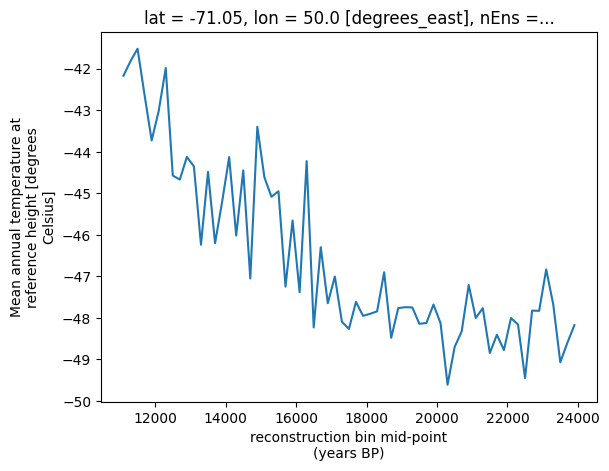

In [11]:
ds_sat['sat'].isel(nEns=0).isel(lat=10).isel(lon=20).plot()

# Doing PCA for ensemble data

In [3]:
import xarray as xr
from sklearn.mixture import GaussianMixture
from toolbox import PCA_functions as pf


# Initialize dictionaries to store the results
exp_v = {}
eofs = {}
pcs = {}

# Loop through each ensemble member in 'nEns'
for i in range(len(ds_sat['nEns'])):
    # Select the ensemble member
    ds_sat_i = ds_sat.isel(nEns=i)
    # print(ds_sat_i.info)


    # Center the data
    ds_sat_i = pf.center_data(ds_sat_i)

    # Weight the Data
    ds_sat_i = pf.apply_weighting(ds_sat_i)

    # # Plot the Centered and Weighted Data for verification
    # lat_index = 77
    # lon_index = 90
    # pf.plot_sat_variables(ds_sat_i, lat_index, lon_index)

    # Perform PCA, using sklearn
    exp_v[i], eofs[i], pcs[i] = pf.sat_PCA_sklearn(ds_sat_i)


shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (65, 13824)
shape of the reshaped sat_centered_weighted: (65, 13824)
shape of PCs: (65, 2)
Explained variance: [0.8142782  0.07032195]
shape of EOFs: (13824, 2)
shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (65, 13824)
shape of the reshaped sat_centered_weighted: (65, 13824)
shape of PCs: (65, 2)
Explained variance: [0.81661904 0.06928887]
shape of EOFs: (13824, 2)
shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (65, 13824)
shape of the reshaped sat_centered_weighted: (65, 13824)
shape of PCs: (65, 2)
Explained variance: [0.82662624 0.06457882]
shape of EOFs: (13824, 2)
shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (65, 13824)
shape of the reshaped sat_centered_weighted: (65, 13824)
shape of PCs: (65, 2)
Explained variance: [0.80023116 0.08671817]
shape of EOFs: (13824, 2)
shape of the weight: (96,)
shape of the reshaped sat_centered_weight

# Save the exp_v, eofs, and pcs 

In [4]:
# store the exp_v, eofs, and pcs to path /ens_ana_data/
import pickle
pickle.dump(exp_v, open('ens_ana_data/exp_v.p', 'wb'))
pickle.dump(eofs, open('ens_ana_data/eofs.p', 'wb'))
pickle.dump(pcs, open('ens_ana_data/pcs.p', 'wb'))


In [1]:
# Load the exp_v, eofs, and pcs from path /ens_ana_data/
import pickle
exp_v = pickle.load(open('ens_ana_data/exp_v.p', 'rb'))
eofs = pickle.load(open('ens_ana_data/eofs.p', 'rb'))
pcs = pickle.load(open('ens_ana_data/pcs.p', 'rb'))

In [3]:
eofs

{0: array([[-6.3837537e-13,  1.6684389e-08],
        [ 7.9280095e-14, -8.5882926e-11],
        [ 3.2845566e-14, -5.4987282e-12],
        ...,
        [ 0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00]], dtype=float32),
 1: array([[-7.34542025e-14, -1.90391077e-07],
        [ 1.18172670e-13,  1.10278606e-10],
        [ 7.57749169e-14, -1.48251481e-11],
        ...,
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00]], dtype=float32),
 2: array([[ 5.5232869e-13, -1.4951561e-07],
        [-2.6839777e-13, -4.8733750e-10],
        [-1.0369706e-13, -1.5973733e-11],
        ...,
        [ 0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00]], dtype=float32),
 3: array([[-4.2330158e-13,  2.5903436e-08],
        [-2.7550079e-13,  1.6842269e-11],
        [-4.3360436e-14, -1.0874468e-11],
    

# Plot histogram of v_exp

In [ ]:
# Load the exp_v, eofs, and pcs from path /ens_ana_data/
import pickle
exp_v = pickle.load(open('ens_ana_data/exp_v.p', 'rb'))

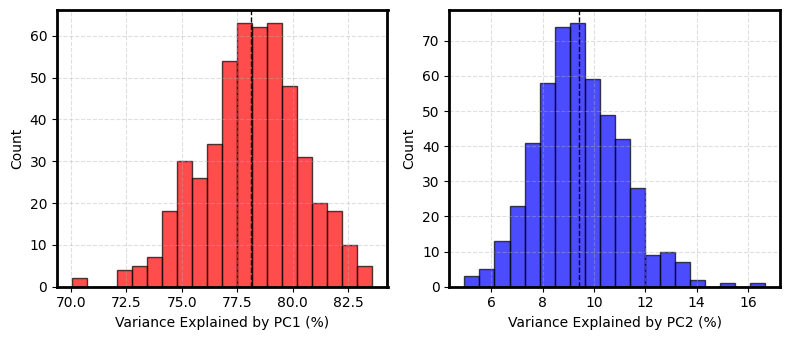

(78.14216, 9.415789)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Correcting the provided code and using ax for each subplot

# Using the same data
x = np.array([exp_v[i][0] for i in exp_v]) * 100  # Multiplying by 100 to get percentage
y = np.array([exp_v[i][1] for i in exp_v]) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3.5))

# Histogram for the first column (x)
ax1.hist(x, bins=20, color='red', alpha=0.7, edgecolor='black', density=False)
ax1.axvline(np.mean(x), color='k', linestyle='dashed', linewidth=1)
ax1.set_xlabel('Variance Explained by PC1 (%)')
ax1.set_ylabel('Count')
ax1.grid(True, linestyle='--',alpha=0.4)
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(2)

# Histogram for the second column (y)
ax2.hist(y, bins=20, color='blue', alpha=0.7, edgecolor='black', density=False)
ax2.axvline(np.mean(y), color='k', linestyle='dashed', linewidth=1)
ax2.set_xlabel('Variance Explained by PC2 (%)')
ax2.set_ylabel('Count')
ax2.grid(True, linestyle='--',alpha=0.4)
for axis in ['top', 'bottom', 'left', 'right']:
    ax2.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.show()

# Printing the means of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)
mean_x, mean_y



In [ ]:
output_path = 'D:/VScode/Last_deglaciation/fig_exp_temp/'
fig.savefig(output_path+'/v_exp.svg', format='svg', bbox_inches='tight')

# Calculate the AIC and Determine the optimal number of classes

In [15]:
import xarray as xr
from sklearn.mixture import GaussianMixture
from toolbox import PCA_functions as pf

n_components_range = range(2, 9)  # 2 to 8 inclusive

aic_values_dict = {}

# Loop over the range of components
for n_components in n_components_range:
    aic_values = []

    for i in range(len(ds_sat['nEns'])):

        # create a 2D GMM model
        gmm = GaussianMixture(n_components=n_components, covariance_type='full')

        gmm.fit(eofs[i])

        aic_values.append(gmm.aic(eofs[i]))
    
    # Record the AIC values for this number of components
    aic_values_dict[n_components] = aic_values

# Save the AIC

In [16]:
# save the aic_values_dict
import pickle
with open('ens_ana_data/aic_values_dict.pkl', 'wb') as f:
    pickle.dump(aic_values_dict, f)

In [1]:
# read the aic_values_dict
import pickle
with open('ens_ana_data/aic_values_dict.pkl', 'rb') as f:
    aic_values_dict = pickle.load(f)

# Plot AIC and delta AIC

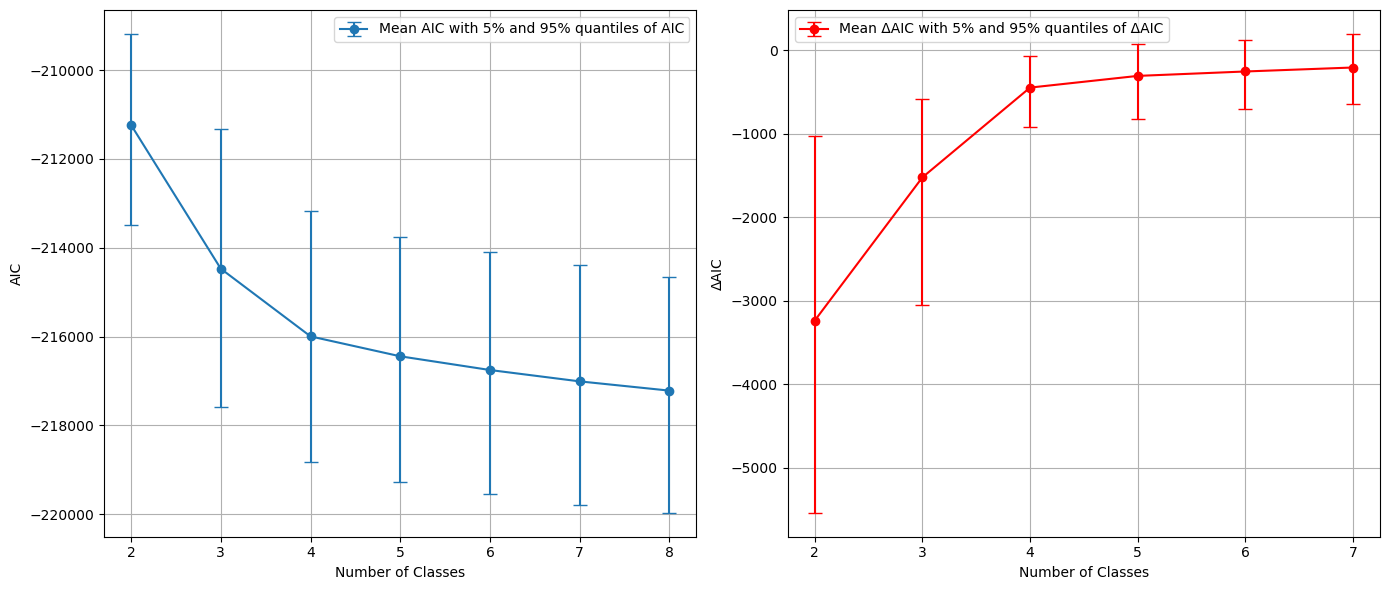

In [4]:
import numpy as np
from matplotlib import pyplot as plt

n_iterations = len(ds_sat['nEns'])

n_components_range = range(2, 9)  # 2 to 8 inclusive

# Compute means, lower and upper limits
means = [np.mean(aic_values_dict[key]) for key in n_components_range]
lower_limits = [np.percentile(aic_values_dict[key], 5) for key in n_components_range]
upper_limits = [np.percentile(aic_values_dict[key], 95) for key in n_components_range]

# Differences from the mean for error bars
lower_errors = [mean - lower for mean, lower in zip(means, lower_limits)]
upper_errors = [upper - mean for mean, upper in zip(means, upper_limits)]

# Compute ΔAIC for each n_components during each Monte Carlo iteration
delta_aics_all_iterations = []
for i in range(n_iterations):
    iteration_delta_aics = np.diff([aic_values_dict[n][i] for n in n_components_range])
    delta_aics_all_iterations.append(iteration_delta_aics)

# Convert to a 2D numpy array for easier operations
delta_aics_all_iterations = np.array(delta_aics_all_iterations)

# Now, compute the mean ΔAIC and its 5% and 95% quantiles
delta_aics_means = np.mean(delta_aics_all_iterations, axis=0)
delta_aics_lowers = np.percentile(delta_aics_all_iterations, 5, axis=0)
delta_aics_uppers = np.percentile(delta_aics_all_iterations, 95, axis=0)

# Differences from the mean ΔAIC for error bars
delta_lower_errors = delta_aics_means - delta_aics_lowers
delta_upper_errors = delta_aics_uppers - delta_aics_means

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# AIC Plot
ax[0].errorbar(n_components_range, means, yerr=[lower_errors, upper_errors], 
               capsize=5, fmt='-o', label='Mean AIC with 5% and 95% quantiles of AIC')
ax[0].set_xlabel('Number of Classes')
ax[0].set_ylabel('AIC')
ax[0].legend()
ax[0].grid(True)

# ΔAIC Plot
ax[1].errorbar(n_components_range[:-1], delta_aics_means, yerr=[delta_lower_errors, delta_upper_errors], 
               capsize=5, fmt='-o', color='red', label='Mean ΔAIC with 5% and 95% quantiles of ΔAIC')
ax[1].set_xlabel('Number of Classes')
ax[1].set_ylabel('ΔAIC')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

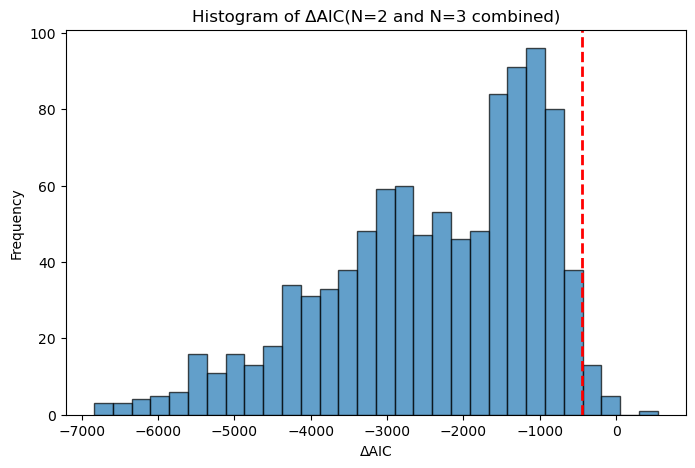

P-value for ΔAIC(N=4) vs ΔAIC(N=2,3): 8.154e-235


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Extract columns for N=2, N=3, and N=4 from delta_aics_all_iterations
delta_aic_n2 = delta_aics_all_iterations[:, 0]  # ΔAIC from 2->3 classes
delta_aic_n3 = delta_aics_all_iterations[:, 1]  # ΔAIC from 3->4 classes
delta_aic_n4 = delta_aics_all_iterations[:, 2]  # ΔAIC from 4->5 classes

# Merge N=2 and N=3 into one distribution
delta_aic_n23 = np.concatenate((delta_aic_n2, delta_aic_n3))

# Plot histogram of ΔAIC(N=2,3) with a vertical line for mean ΔAIC(N=4)
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(delta_aic_n23, bins=30, alpha=0.7, color='C0', edgecolor='k')
ax.axvline(np.mean(delta_aic_n4), color='red', linestyle='--', linewidth=2)
ax.set_title('Histogram of ΔAIC(N=2 and N=3 combined)')
ax.set_xlabel('ΔAIC')
ax.set_ylabel('Frequency')

plt.show()

# Compute p-value comparing ΔAIC(N=4) to the combined ΔAIC(N=2,3) distribution
p_value_n4_vs_n23 = ttest_ind(delta_aic_n4, delta_aic_n23, equal_var=False).pvalue
print(f'P-value for ΔAIC(N=4) vs ΔAIC(N=2,3): {p_value_n4_vs_n23:.4g}')


# Doing GMM for each sat dataset in the ensembles

In [4]:
from sklearn.mixture import GaussianMixture
import numpy as np

# create a 2D GMM model
gmm_model = GaussianMixture(n_components=4, covariance_type='full')

gmm_model.fit(eofs[0])

# get the predicted class labels for each data point
labels = gmm_model.predict(eofs[0])

probabilities = gmm_model.predict_proba(eofs[0])
max_prob = np.amax(probabilities, axis=1)


In [9]:
max_prob.shape

(13824,)

In [7]:
eofs[0].shape

(13824, 2)

In [6]:

probabilities.shape

(13824, 4)

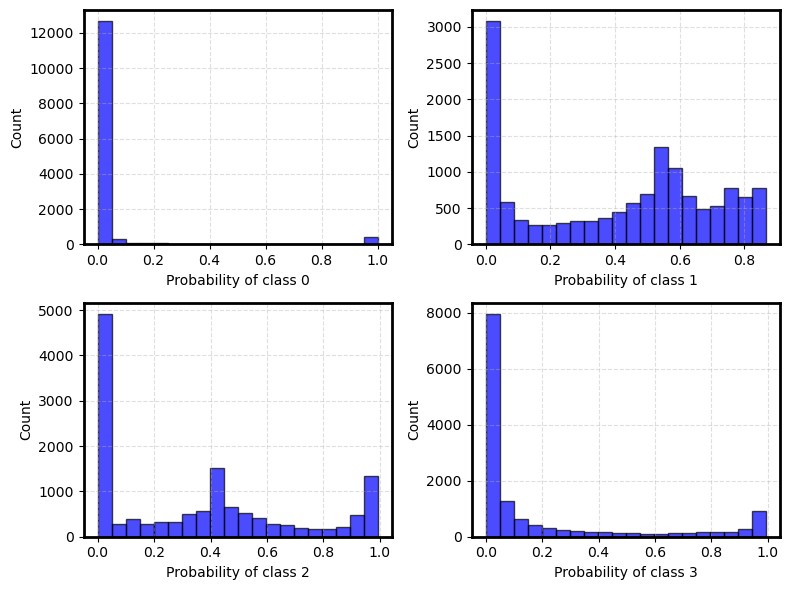

In [ ]:
# probabilities is a ndarray with shape (13824, 4), plot histogram for each column
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, figsize=(8, 6))

for i in range(4):
    ax[i//2, i%2].hist(probabilities[:, i], bins=20, color='blue', alpha=0.7, edgecolor='black', density=False)
    ax[i//2, i%2].set_xlabel('Probability of class {}'.format(i+1))
    ax[i//2, i%2].set_ylabel('Count')
    ax[i//2, i%2].grid(True, linestyle='--',alpha=0.4)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax[i//2, i%2].spines[axis].set_linewidth(2)

# adjust subplot distance
plt.tight_layout()

0.5096312847977696


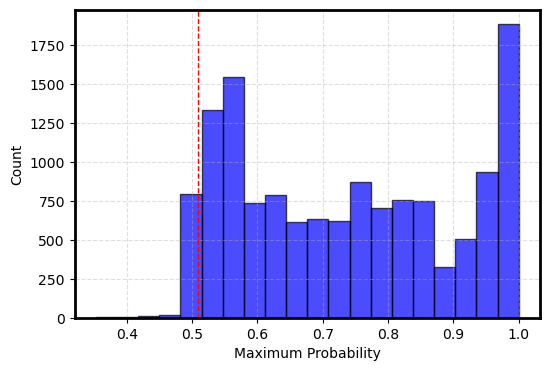

In [17]:
# plot a histogram of the maximum probability
plt.figure(figsize=(6, 4))
plt.hist(max_prob, bins=20, color='blue', alpha=0.7, edgecolor='black', density=False)
# plot a veritcal line at the 5th percentile
plt.axvline(np.percentile(max_prob, 5), color='r', linestyle='dashed', linewidth=1)
print(np.percentile(max_prob, 5))
plt.xlabel('Maximum Probability')
plt.ylabel('Count')
plt.grid(True, linestyle='--',alpha=0.4)
for axis in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[axis].set_linewidth(2)

In [9]:
probabilities.shape

(13824, 4)

In [18]:
max_prob.shape

(13824,)

In [10]:
probabilities

array([[0.00057039, 0.54135043, 0.4179127 , 0.04016648],
       [0.00057039, 0.54135088, 0.41791236, 0.04016637],
       [0.00057039, 0.54135088, 0.41791237, 0.04016637],
       ...,
       [0.00057039, 0.54135088, 0.41791237, 0.04016637],
       [0.00057039, 0.54135088, 0.41791237, 0.04016637],
       [0.00057039, 0.54135088, 0.41791237, 0.04016637]])

In [22]:
# print the sum of the probabilities for each row
proba_sum=np.sum(probabilities, axis=1)

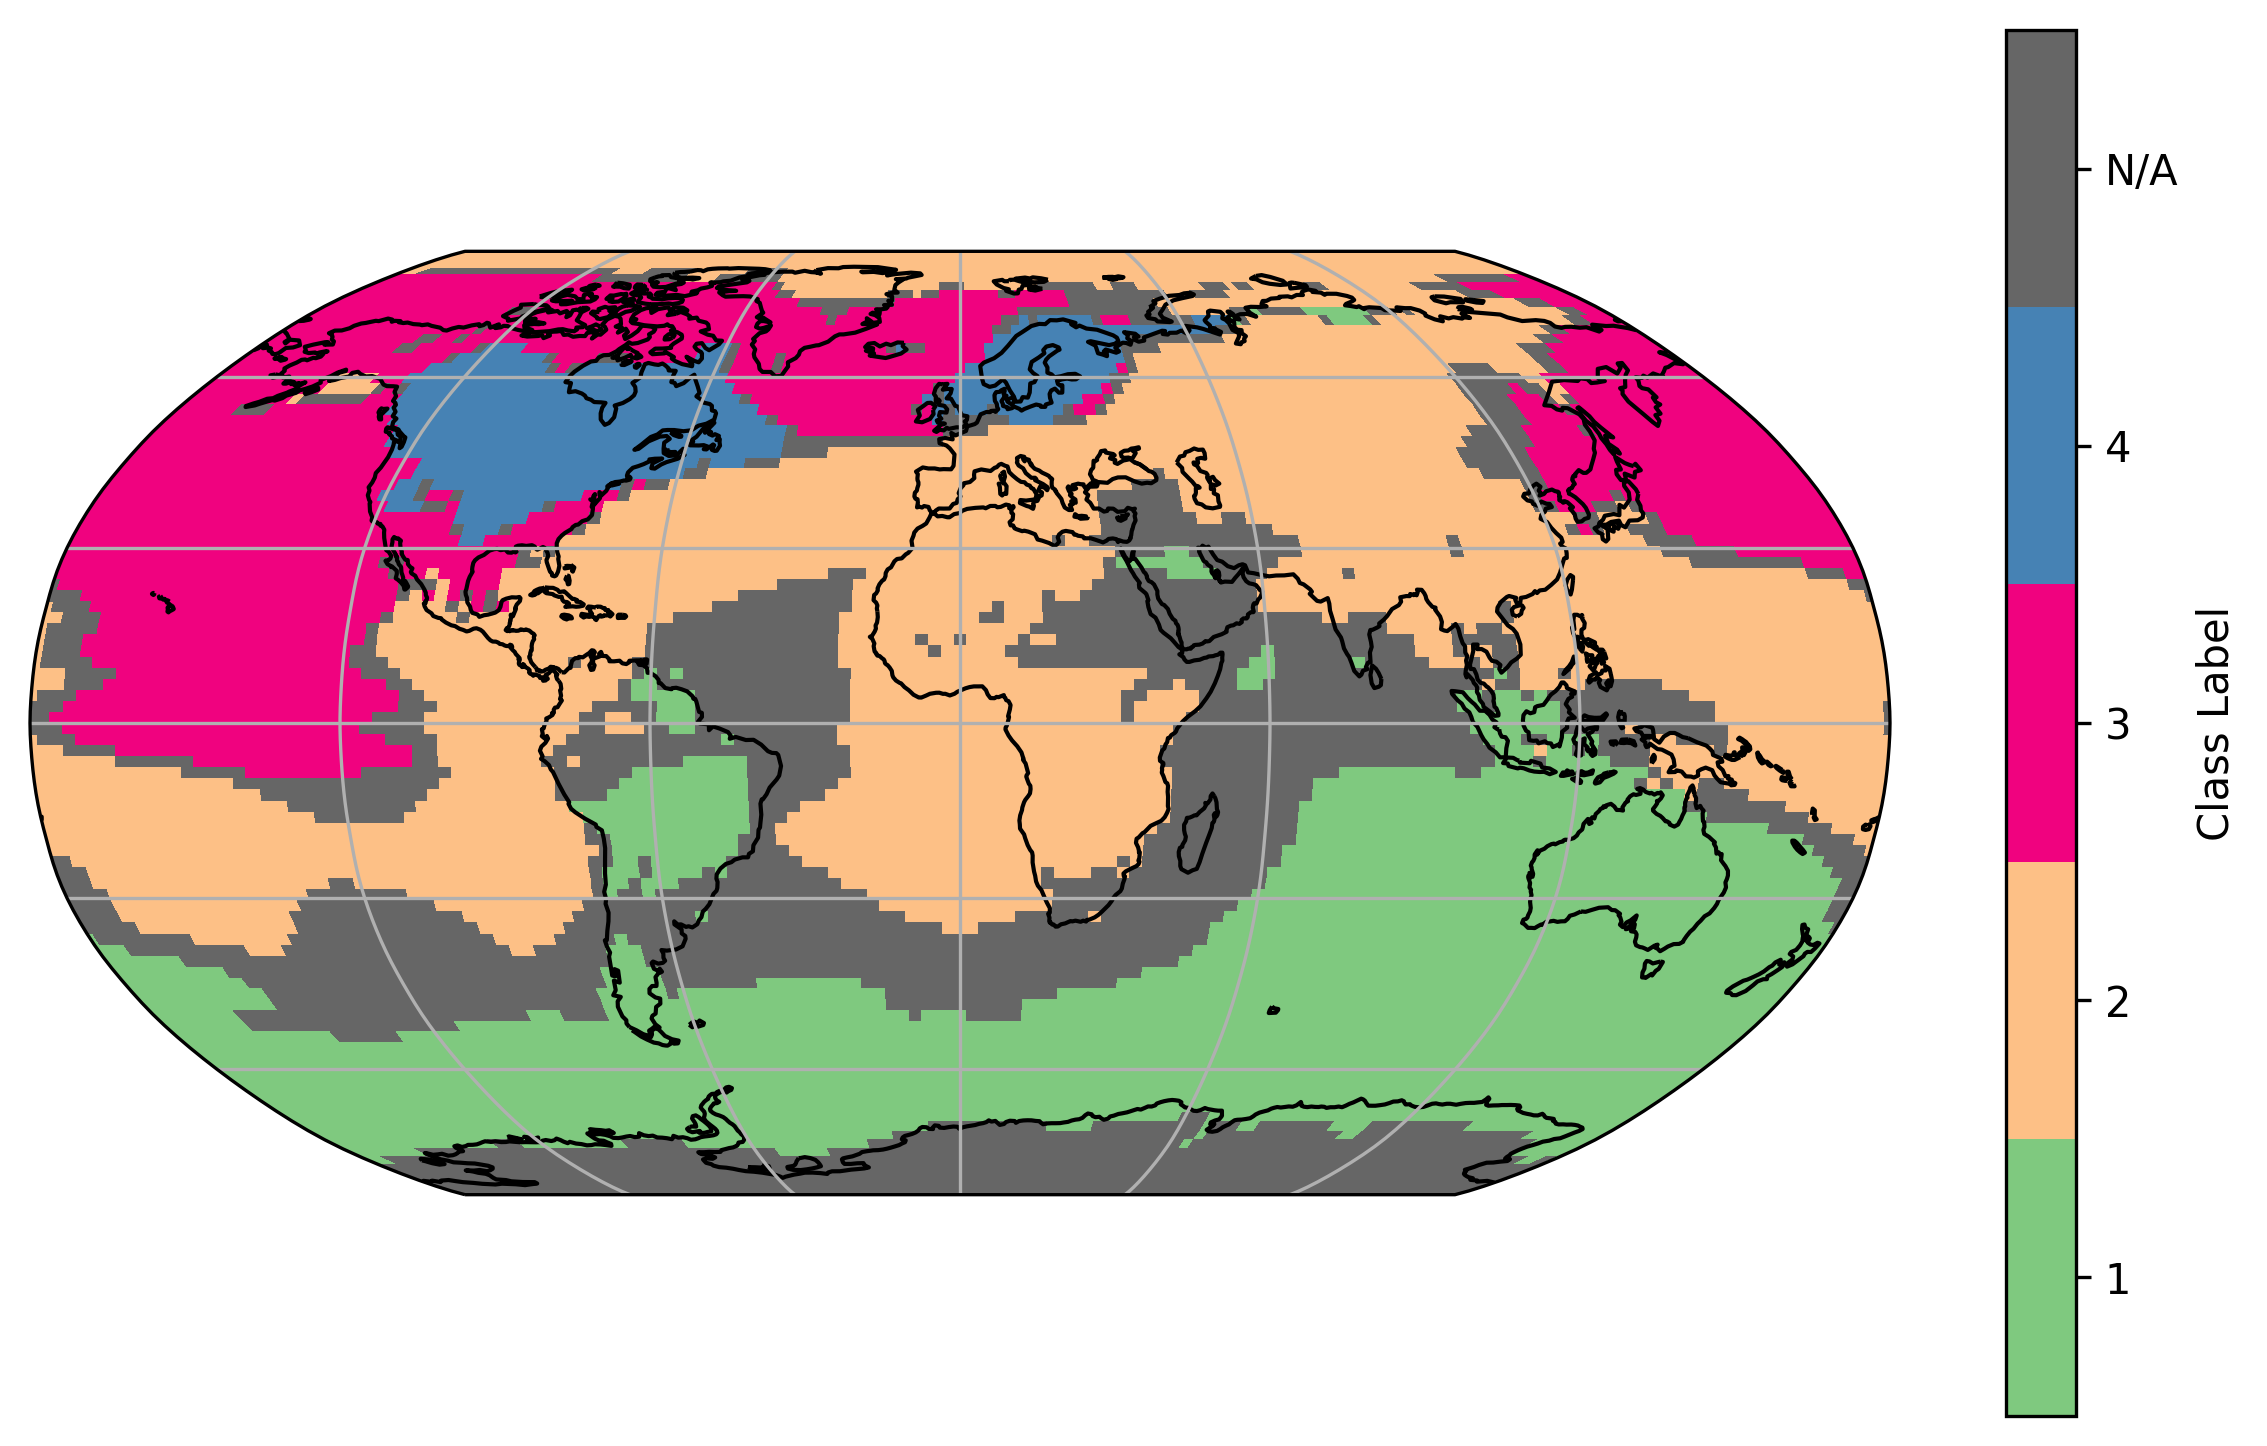

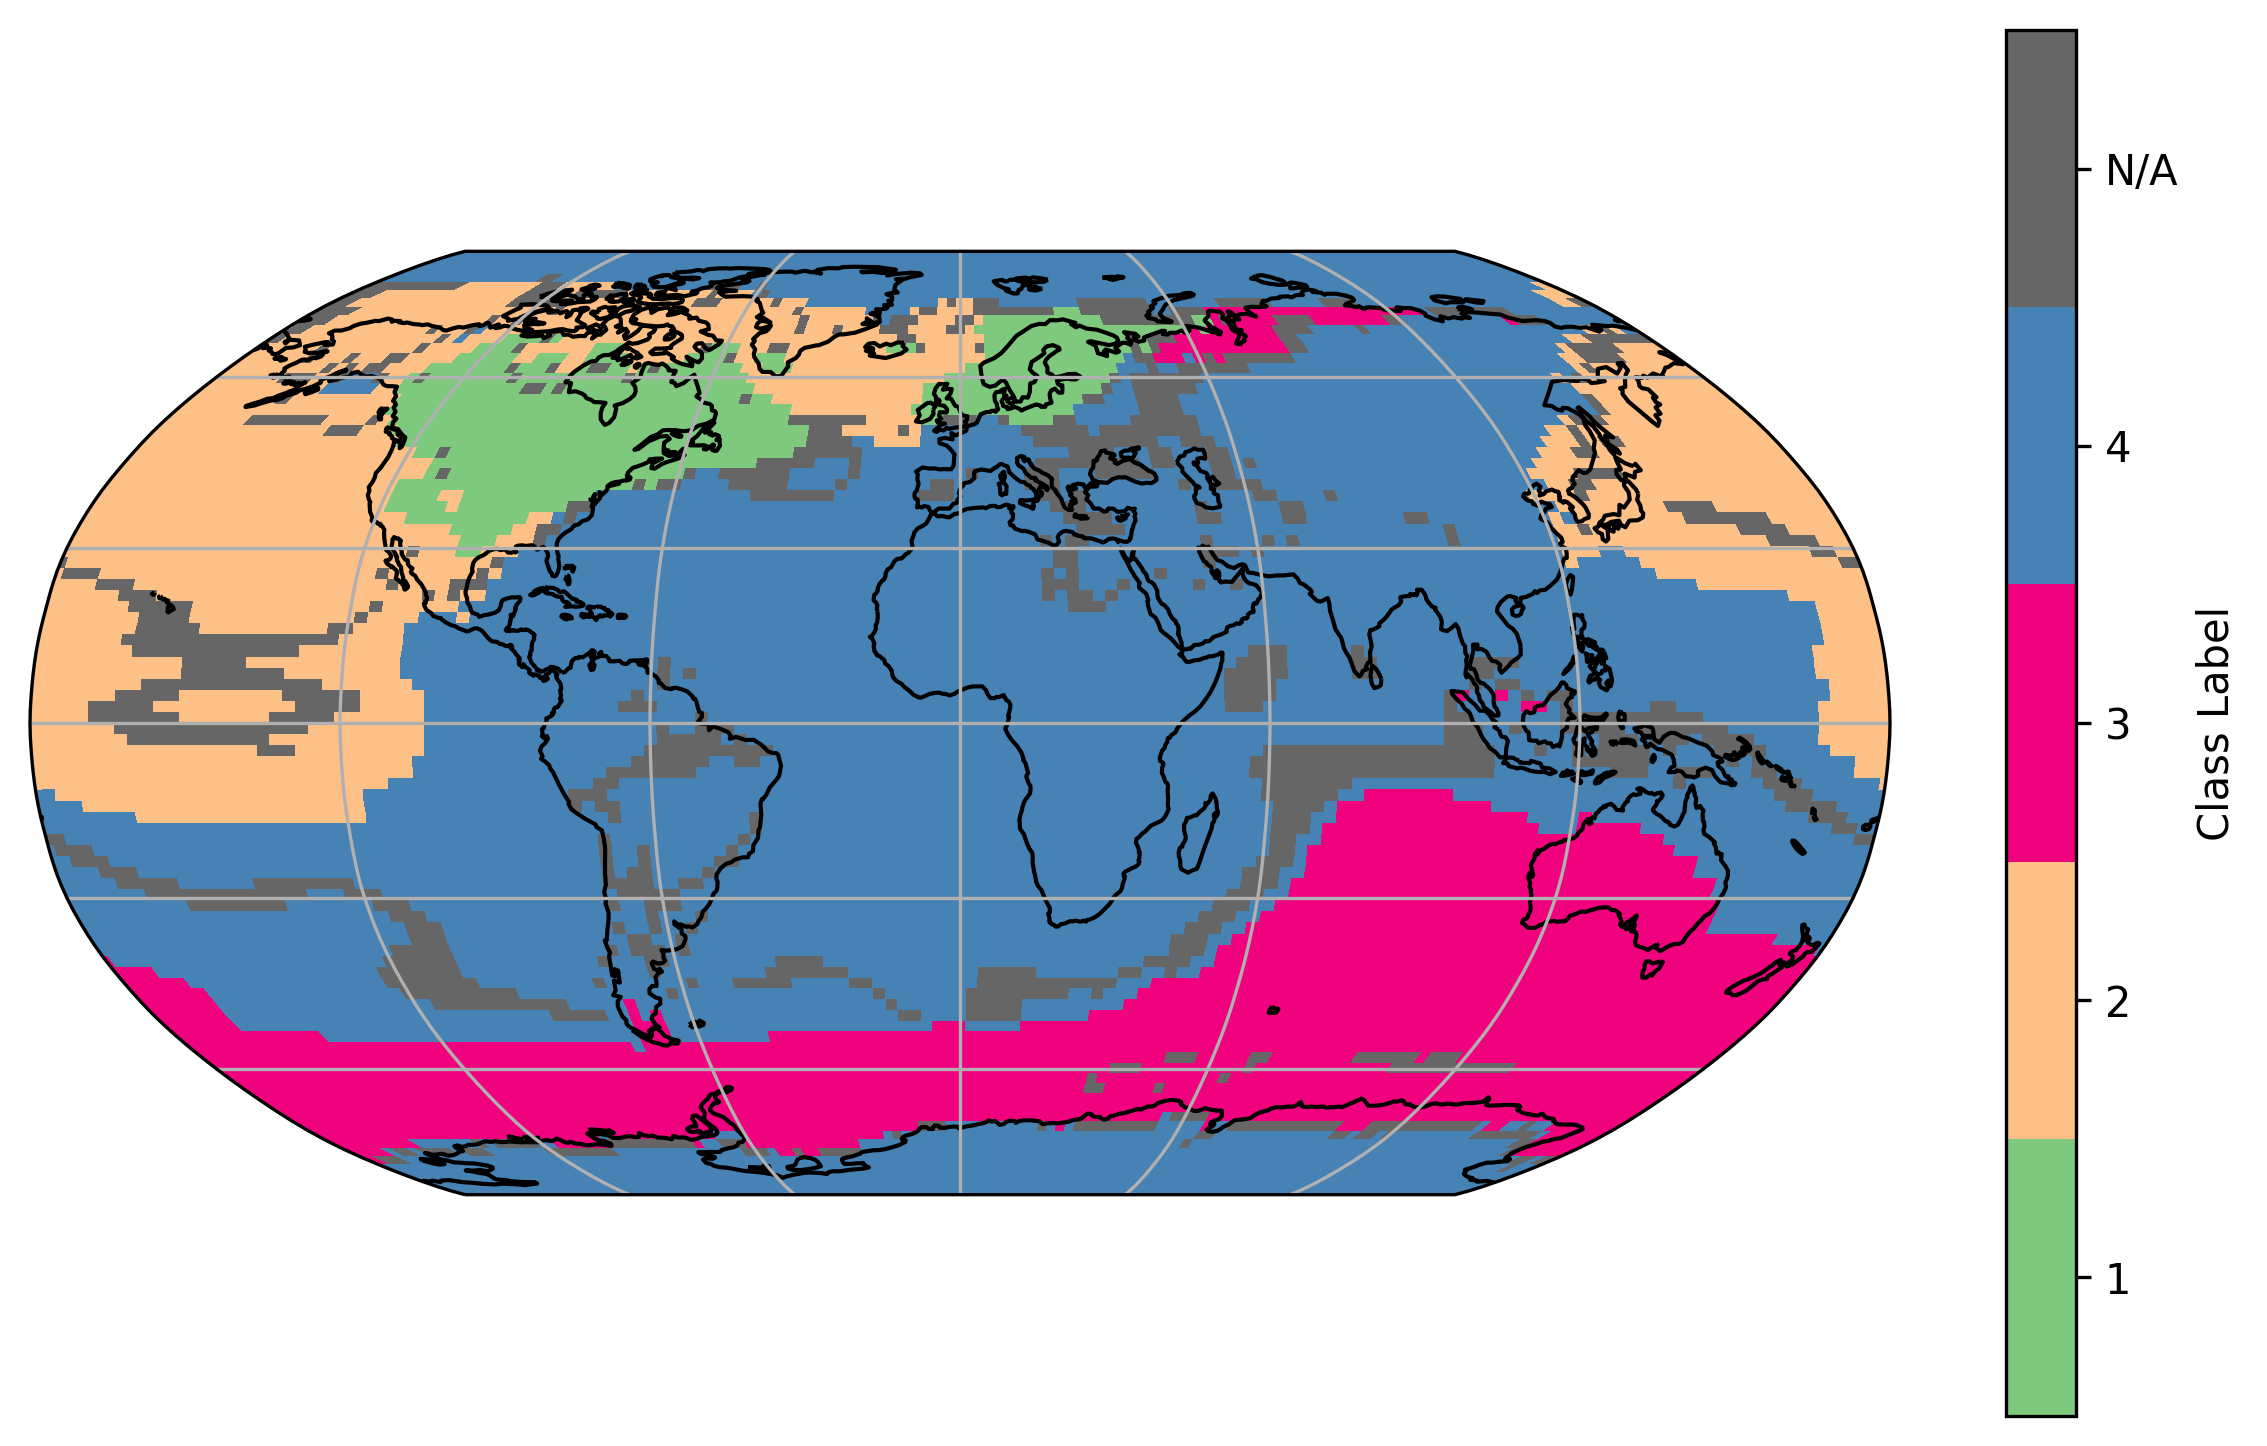

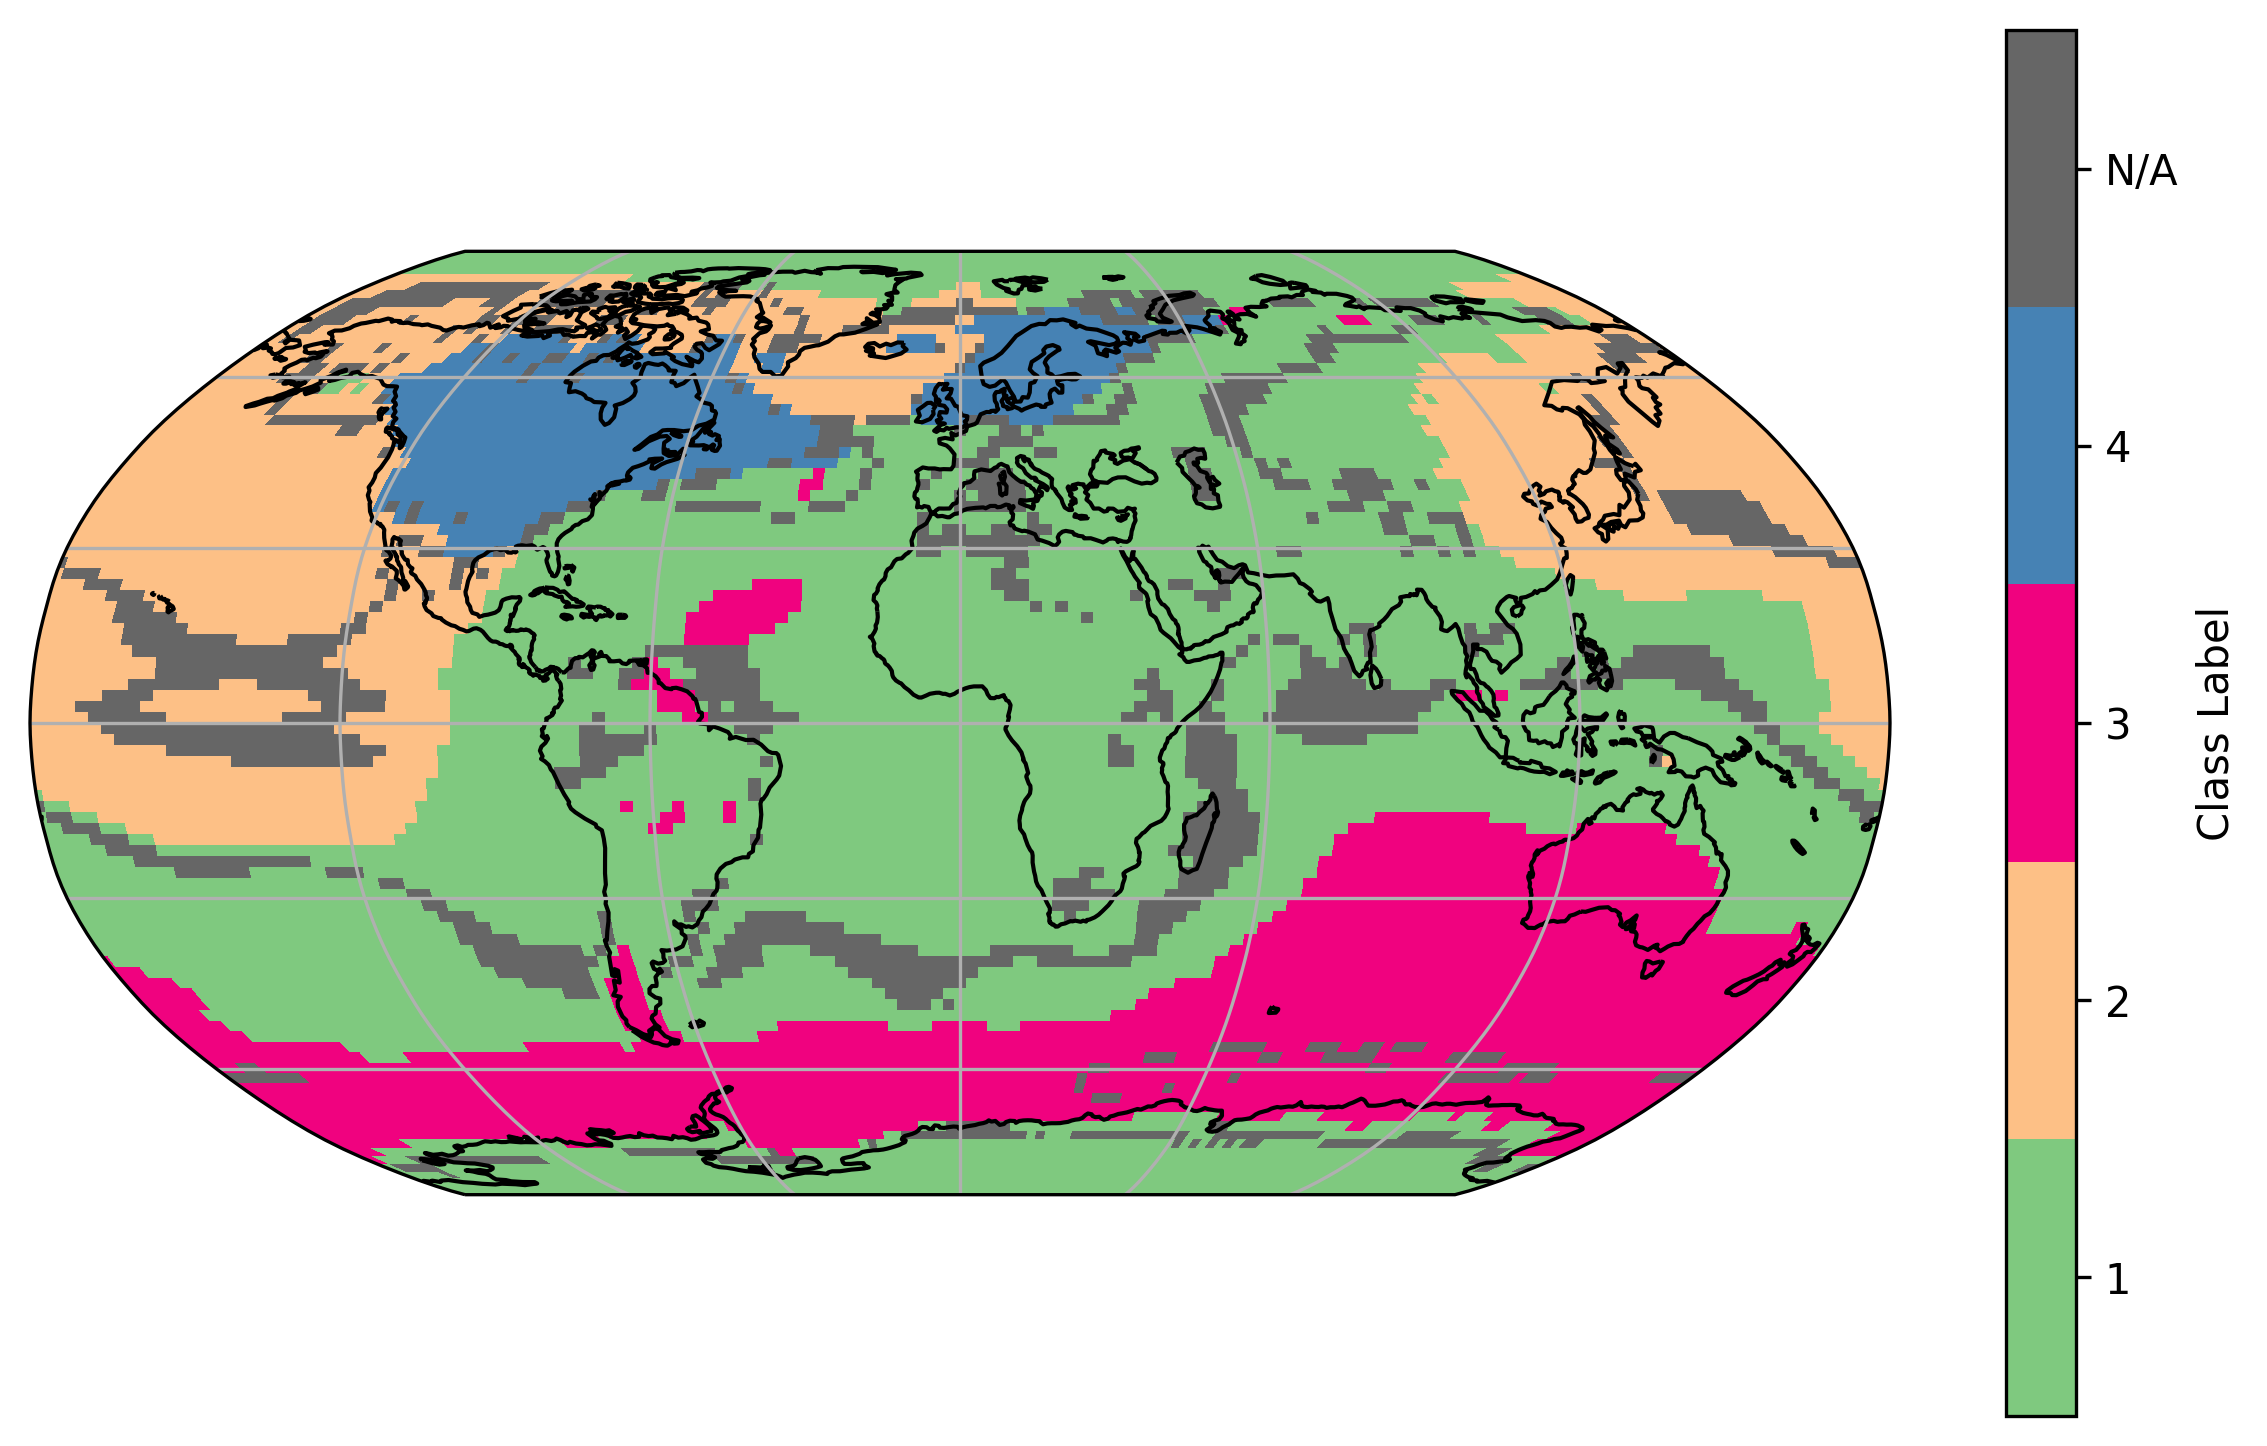

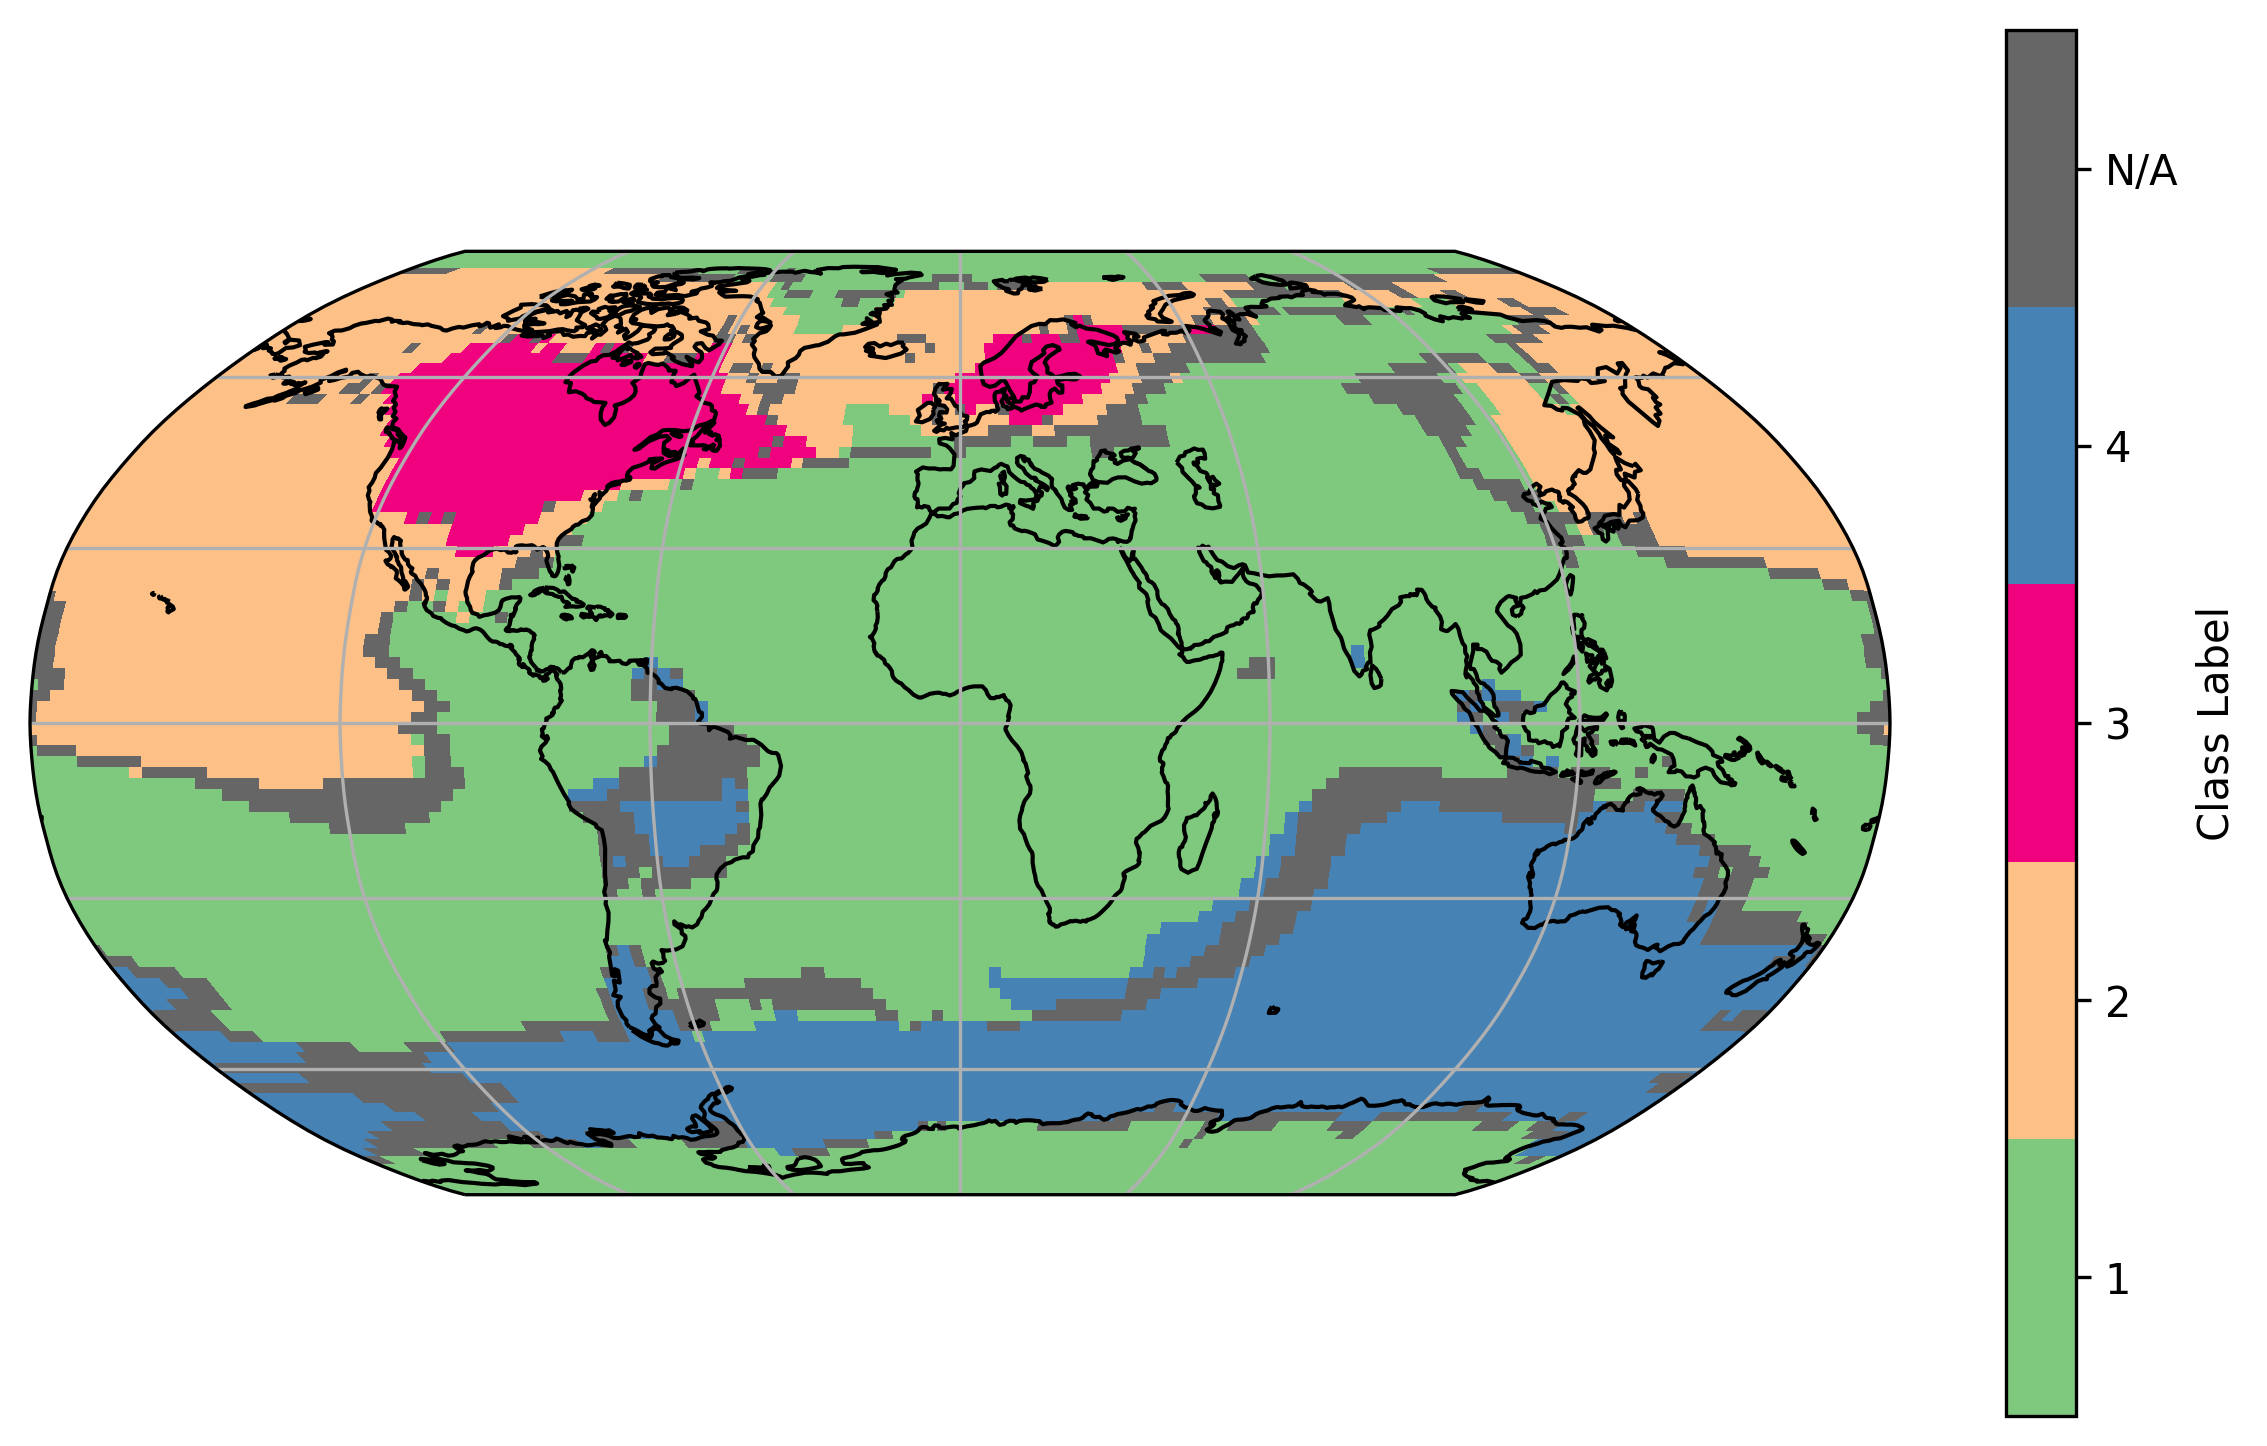

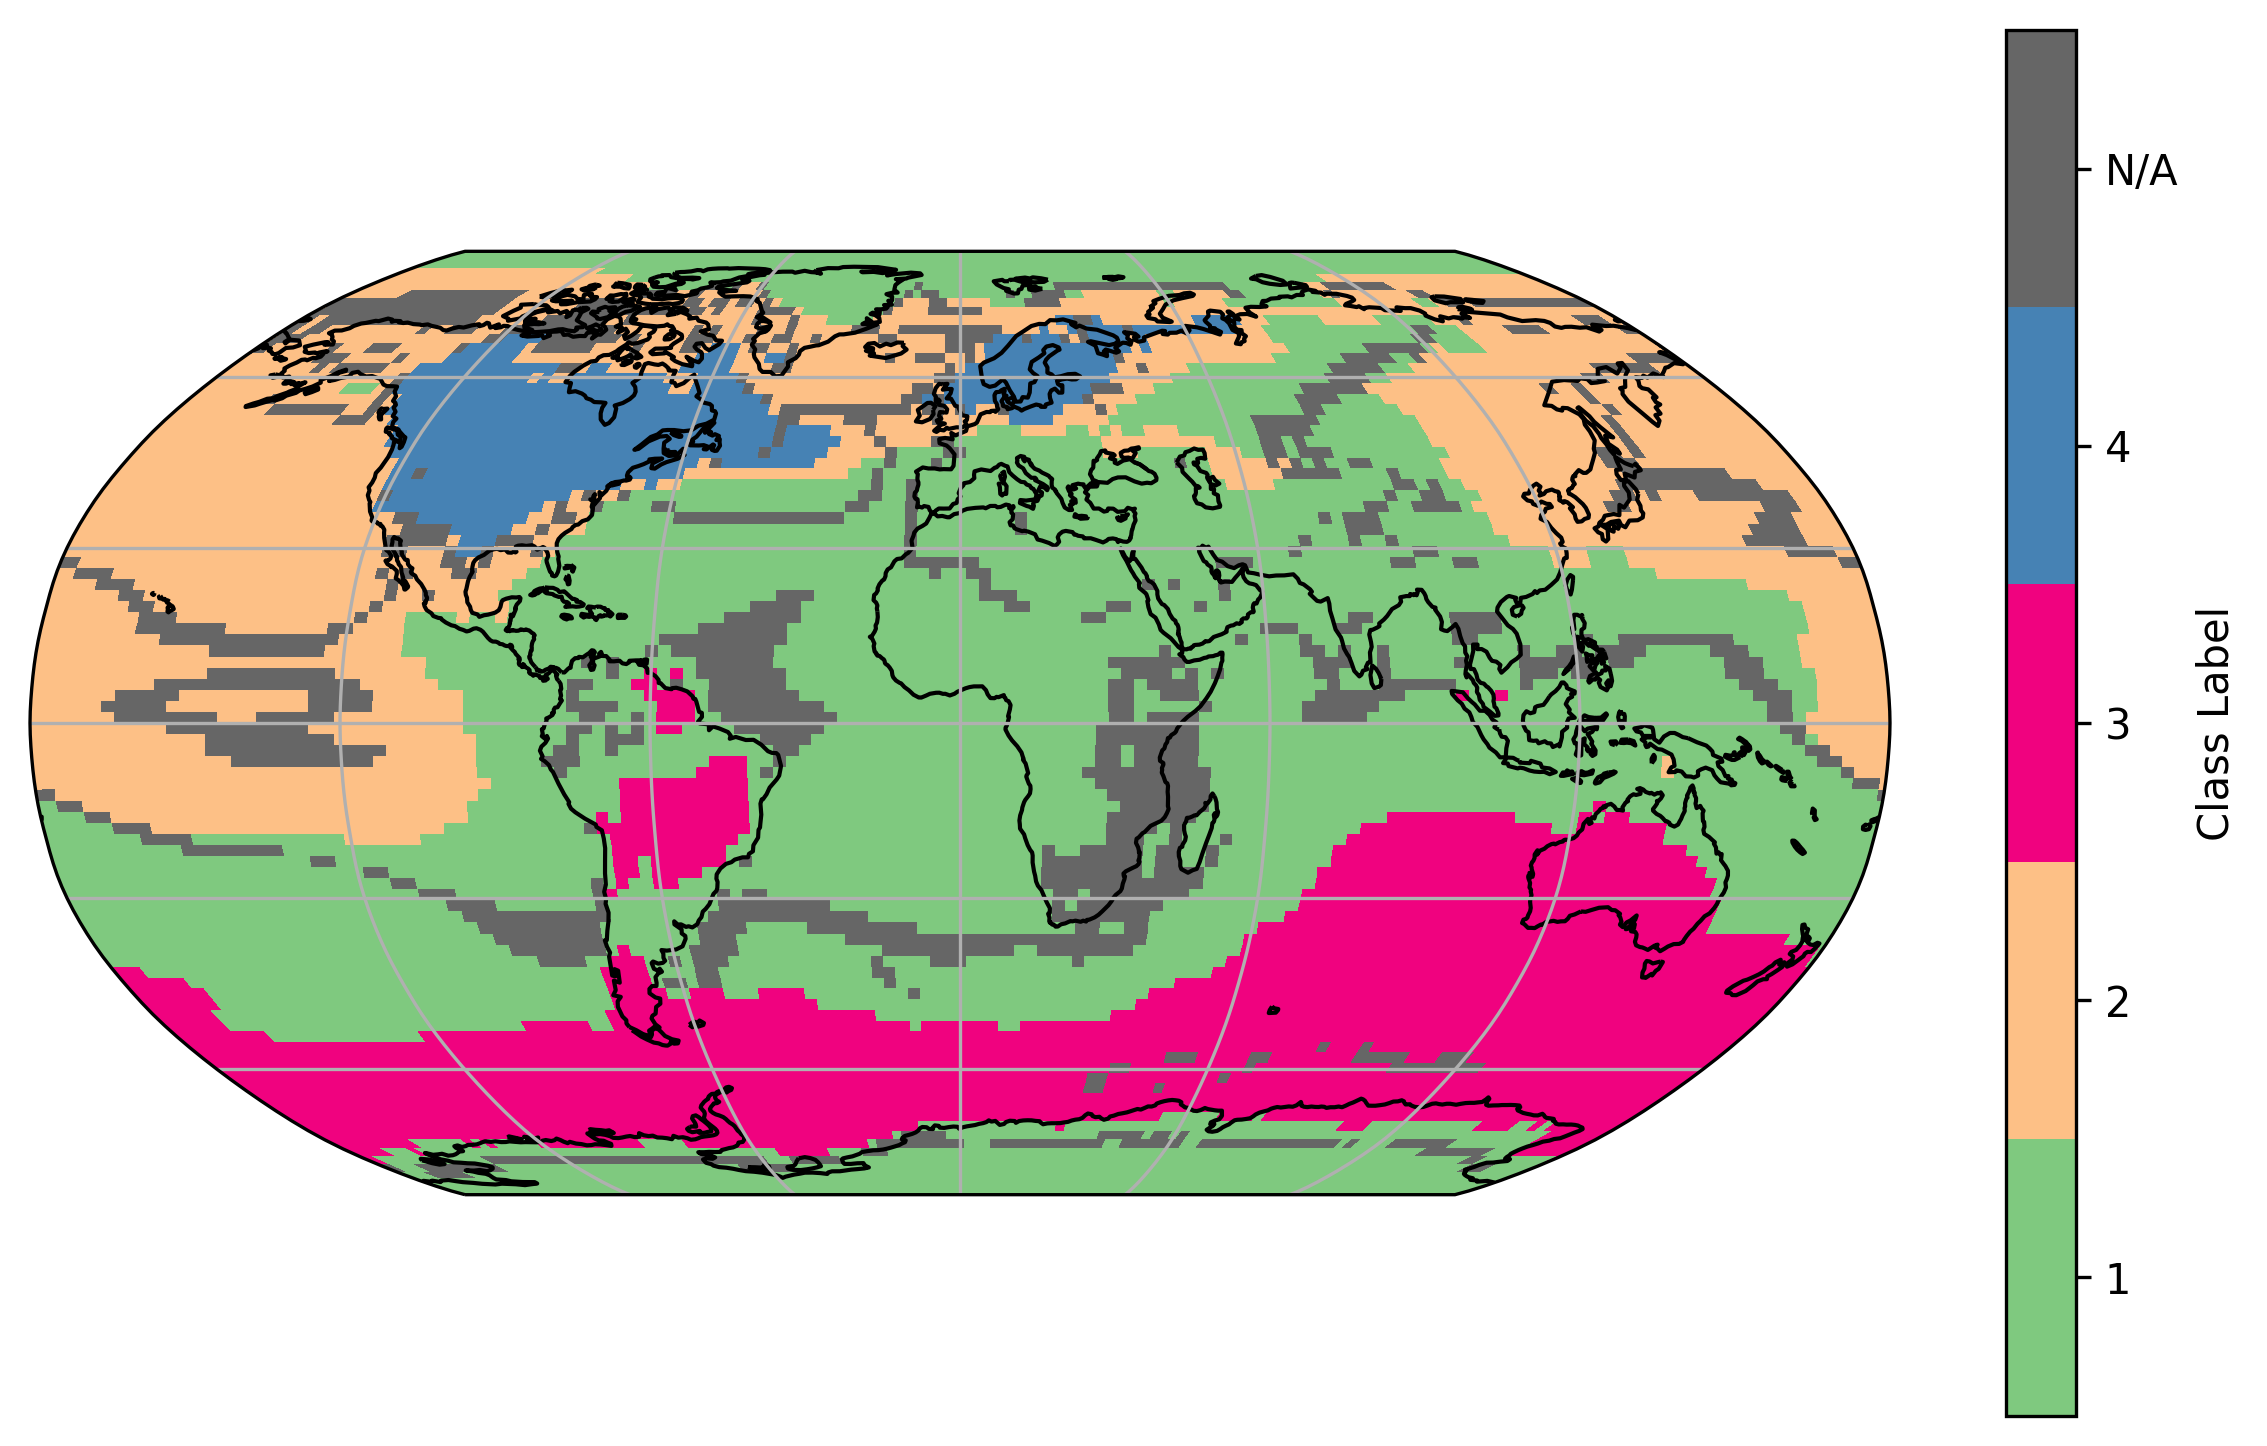

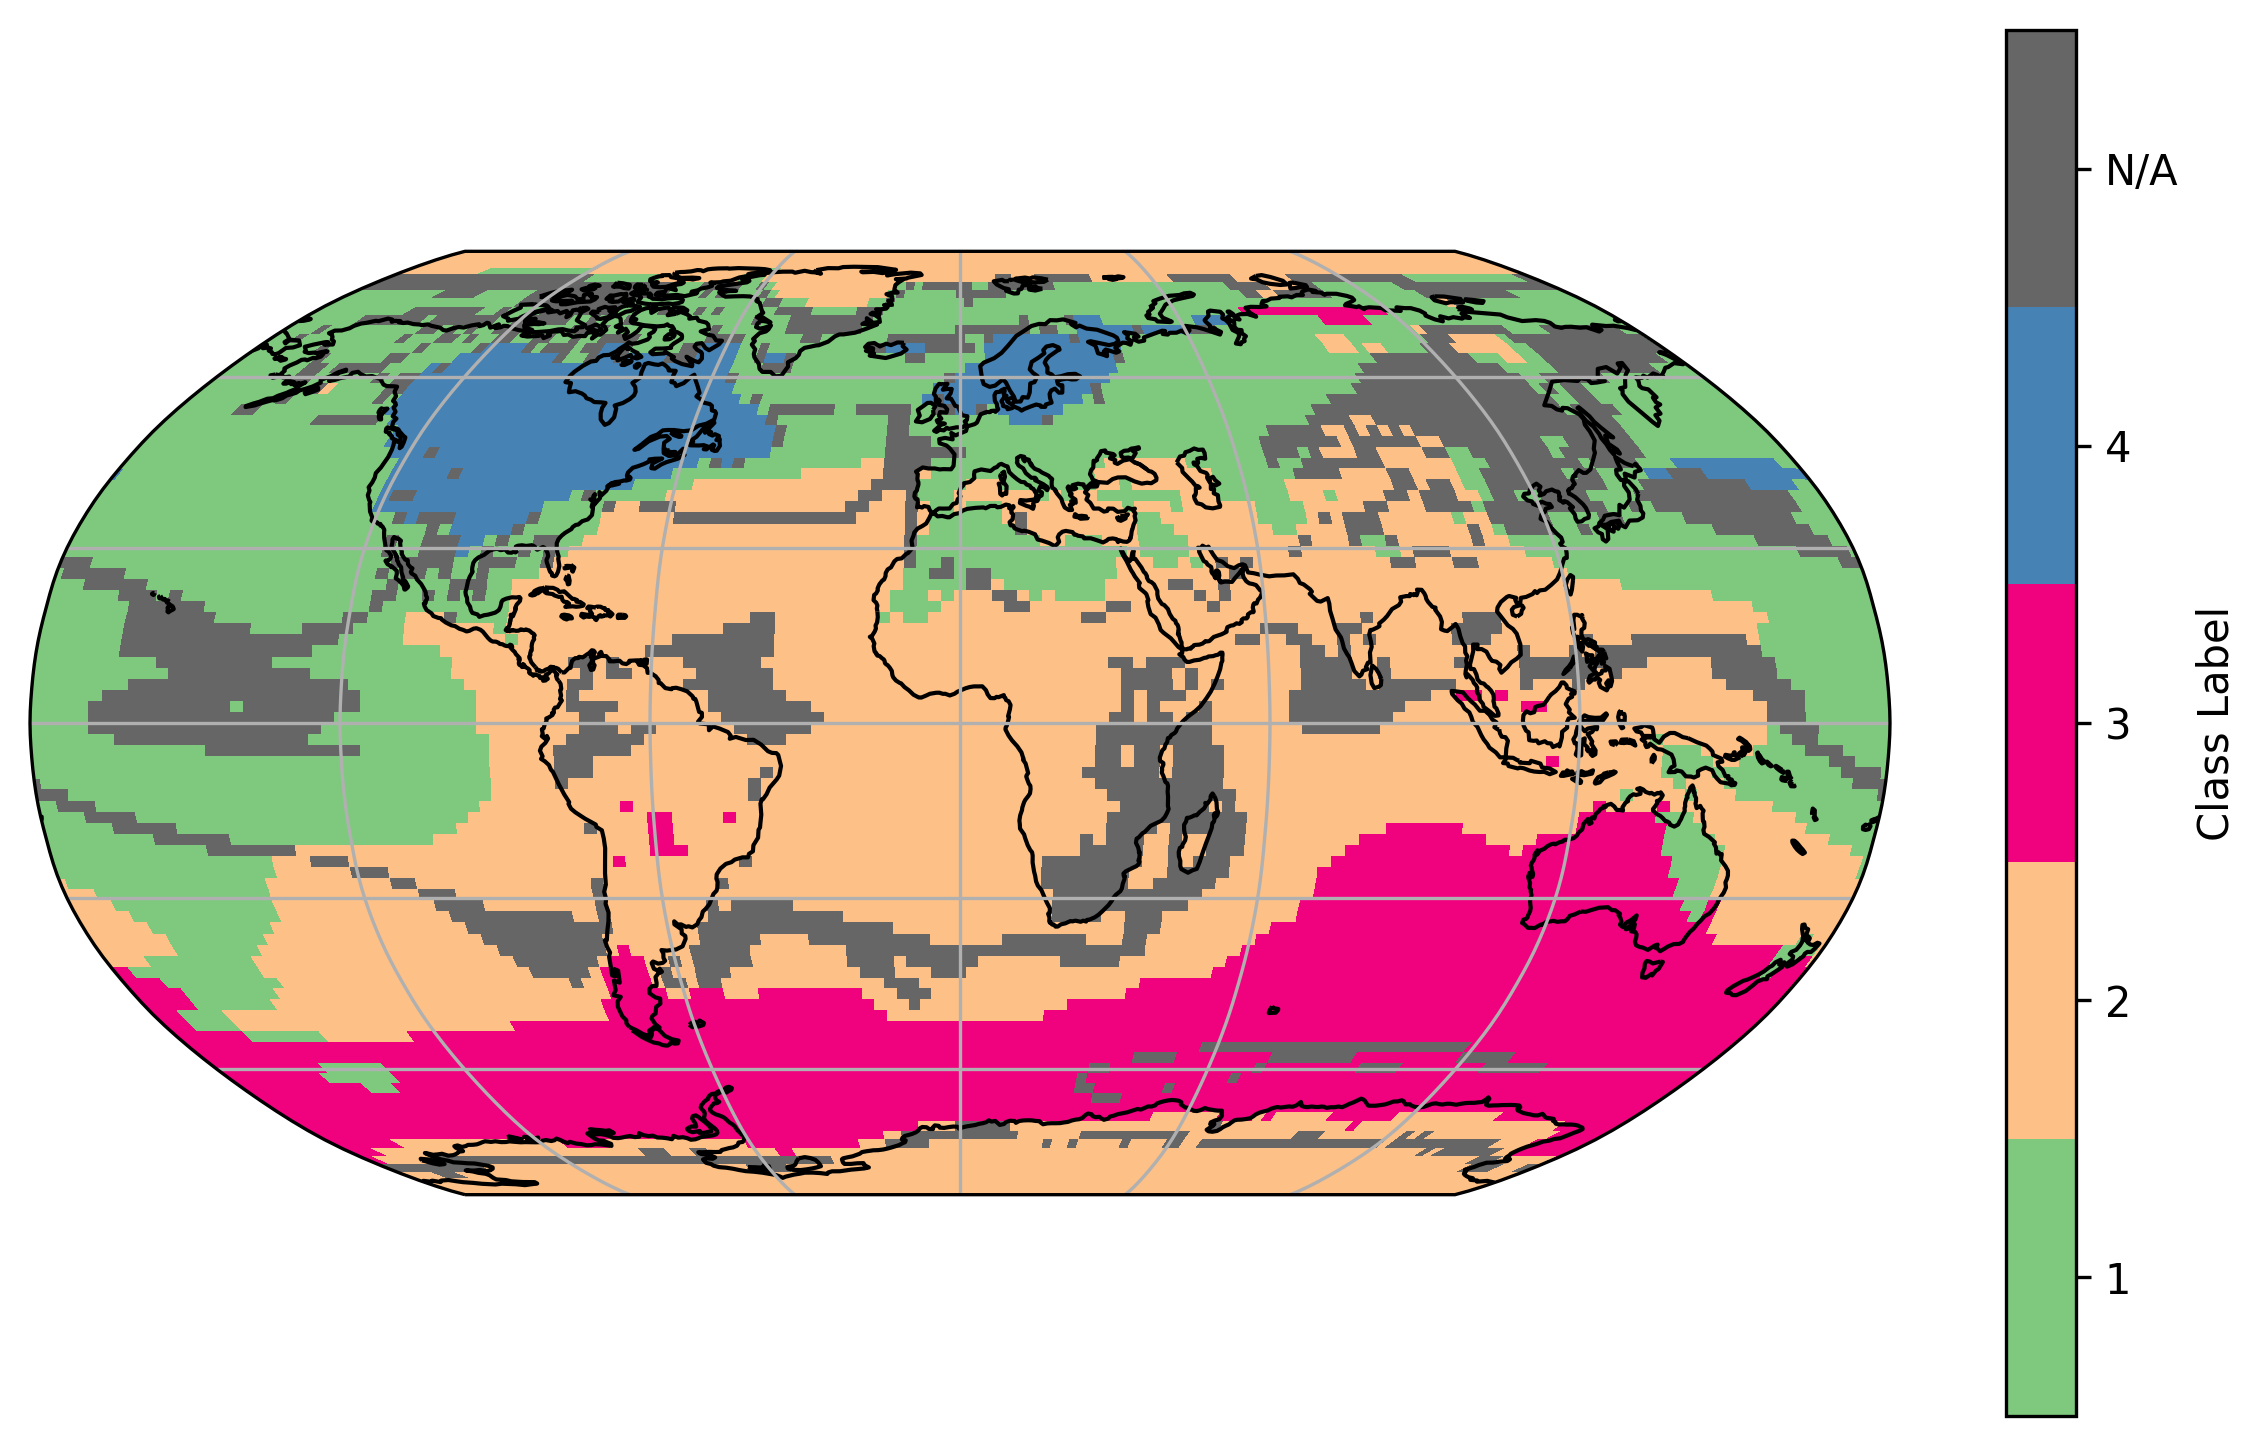

In [14]:
import xarray as xr
from sklearn.mixture import GaussianMixture
from toolbox import PCA_functions as pf
from toolbox import GMM_functions as gf

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap


labels_Ens = []
probs_ens=[]

n_components=4


# Loop through each ensemble member in 'nEns'
for i in range(len(ds_sat['nEns'])):

    # create a 2D GMM model
    gmm_model = GaussianMixture(n_components=n_components, covariance_type='full')

    # fit the model to the two columns of PCA scores
    gmm_model.fit(eofs[i])

    # get the predicted class labels for each data point
    labels = gmm_model.predict(eofs[i])

    probabilities = gmm_model.predict_proba(eofs[0])
    max_prob = np.amax(probabilities, axis=1)

    # Store results for each iteration
    labels_Ens.append({
        'labels': labels,
    })

    probs_ens.append({
        'max_prob': max_prob,
    })

    if i<=5:
        # Select the ensemble member
        ds_sat_i = ds_sat.isel(nEns=i)
        ds_sat_i['class_label'] = (('lat', 'lon'), labels.reshape(ds_sat_i['sat'].shape[1], ds_sat_i['sat'].shape[2]))
        # gf.plot_labels(ds_sat_i)

        class_labels = ds_sat_i['class_label'].values  # Ensure this is your class label data

        n_components = 4
        # Define a new class label for low probabilities
        low_prob_label = n_components 

        # Update class_labels for locations where prob < 0.9 to the new class
        # class_labels_updated = np.where(probs < 0.9, low_prob_label, class_labels)

        class_labels_updated = np.where(max_prob.reshape(96,144) < 0.59, low_prob_label, class_labels)

        # Custom colors including gray for low probability
        custom_colors = [
            (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
            (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
            (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
            (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),
            (0.4, 0.4, 0.4)  # Gray for low prob
        ]
        cmap = ListedColormap(custom_colors)

        # Setup plot
        fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()}, figsize=(10, 6), dpi=300)
        ax.add_feature(cfeature.COASTLINE)
        ax.gridlines()

        # Generating meshgrid for lon-lat with one additional point in each dimension
        lon, lat = np.meshgrid(np.linspace(ds_sat_i.lon.min(), ds_sat_i.lon.max(), len(ds_sat_i.lon)), 
                            np.linspace(ds_sat_i.lat.min(), ds_sat_i.lat.max(), len(ds_sat_i.lat)))

        # Plot using pcolormesh
        pcolormesh = ax.pcolormesh(lon, lat, class_labels_updated, cmap=cmap, shading='auto', transform=ccrs.PlateCarree())

        # Colorbar setup
        bounds = np.arange(-0.5, len(custom_colors)+1 - 0.5, 1)
        cbar = plt.colorbar(pcolormesh, boundaries=bounds, ticks=np.arange(len(custom_colors)), label='Class Label')
        cbar.set_ticklabels(['1', '2', '3', '4', 'N/A'])  # Adjust labels as needed

        plt.show()





# Save the labels

In [15]:
# save the labels_Ens
import pickle
with open('ens_ana_data/labels_Ens.pkl', 'wb') as f:
    pickle.dump(labels_Ens, f)

In [1]:
# read the labels_Ens
import pickle
with open('ens_ana_data/labels_Ens.pkl', 'rb') as f:
    labels_Ens = pickle.load(f)

# Save probs

In [17]:
# save the probs_ens
import pickle
with open('ens_ana_data/probs_ens.pkl', 'wb') as f:
    pickle.dump(probs_ens, f)

In [18]:
# read the probs_ens
import pickle
with open('ens_ana_data/probs_ens.pkl', 'rb') as f:
    probs_ens = pickle.load(f)

# Plot the uncorrected labels

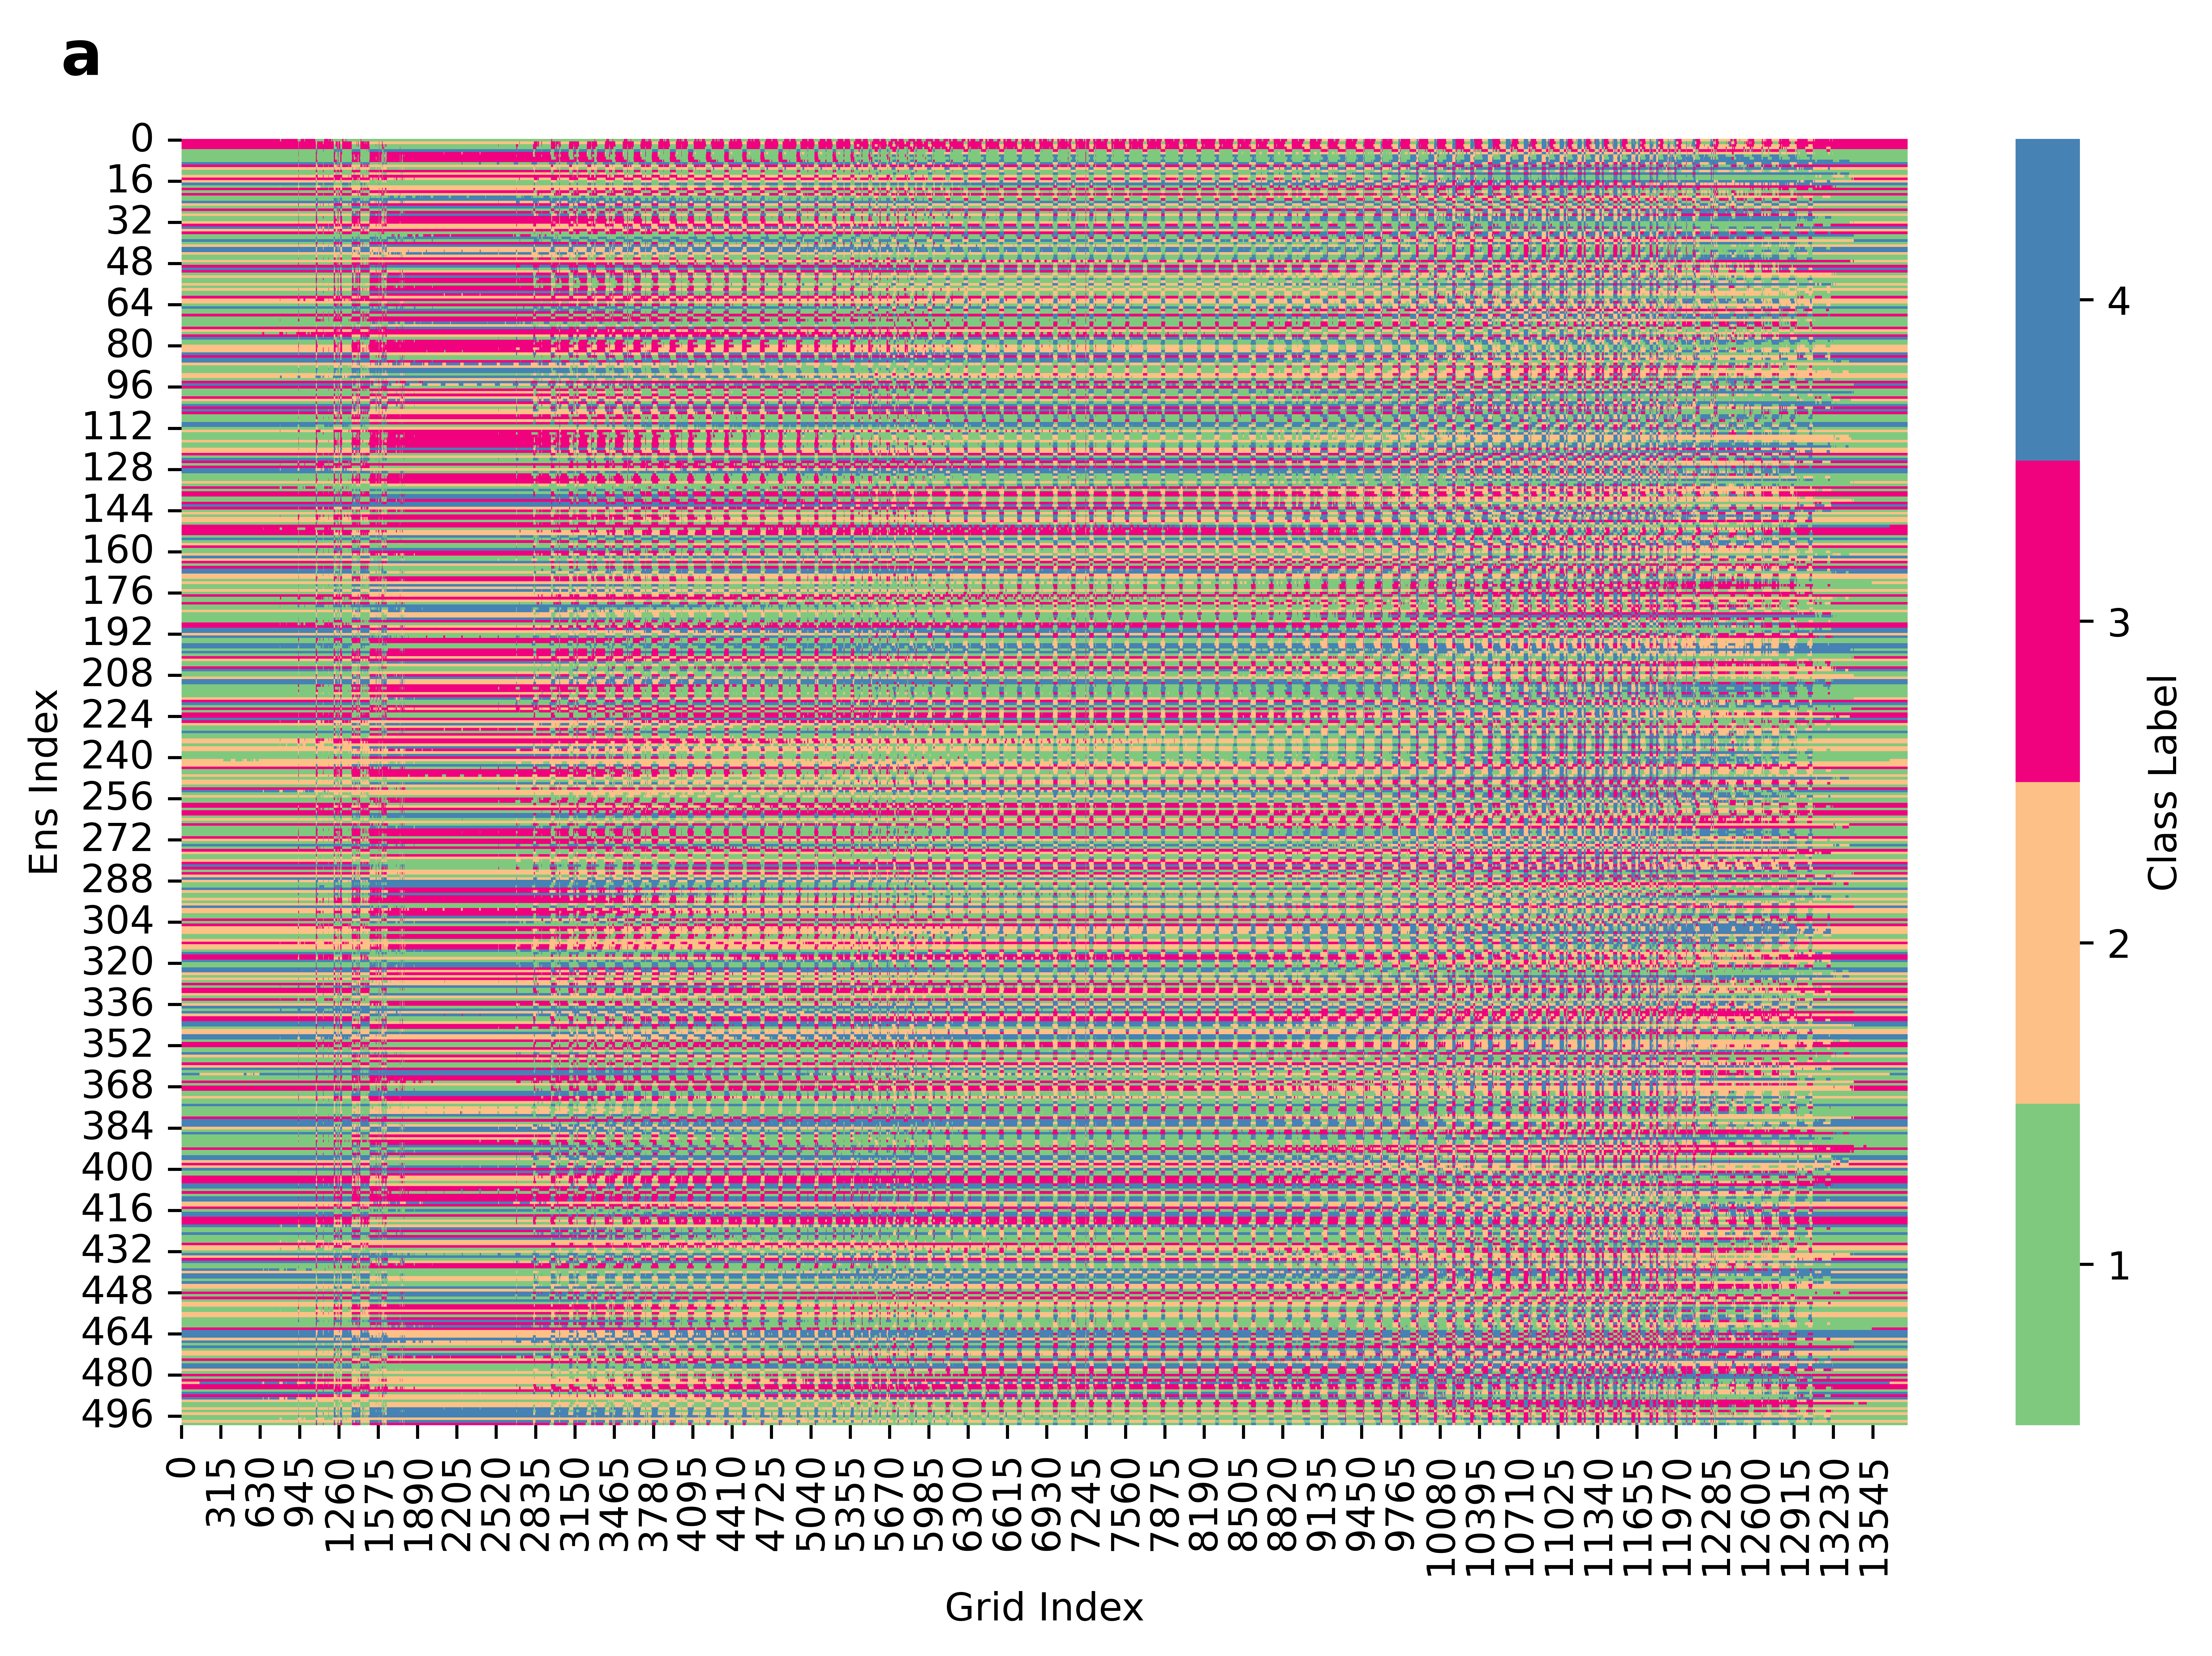

In [4]:
from toolbox import Ens_ana_functions as eaf
import importlib
importlib.reload(eaf)

fig_uncorr_label=eaf.plot_ens_labels(labels_Ens,dpi=900,panel_label='a')
fig_uncorr_label.savefig('outputs/figureS2a.pdf', format='pdf', dpi=100, bbox_inches='tight')

# Load the reference labels

In [20]:
# load the ds_GMM_climo_relabeled
import xarray as xr
ds_GMM_climo_relabeled = xr.open_dataset('climo_ana_data/ds_GMM_climo_relabeled.nc')
# ds_GMM_climo_relabeled
ref_labels = ds_GMM_climo_relabeled['class_relabeled'].values.reshape(96*144,)

# Correct labels

In [21]:
from toolbox import Ens_ana_functions as eaf
labels_Ens_aligned=eaf.align_labels(labels_Ens,reference_labels=ref_labels)

In [22]:
# store the corrected labels
import pickle
with open('ens_ana_data/labels_Ens_aligned.pkl', 'wb') as f:
    pickle.dump(labels_Ens_aligned, f)


In [5]:
# read the corrected labels
import pickle
with open('ens_ana_data/labels_Ens_aligned.pkl', 'rb') as f:
    labels_Ens_aligned = pickle.load(f)

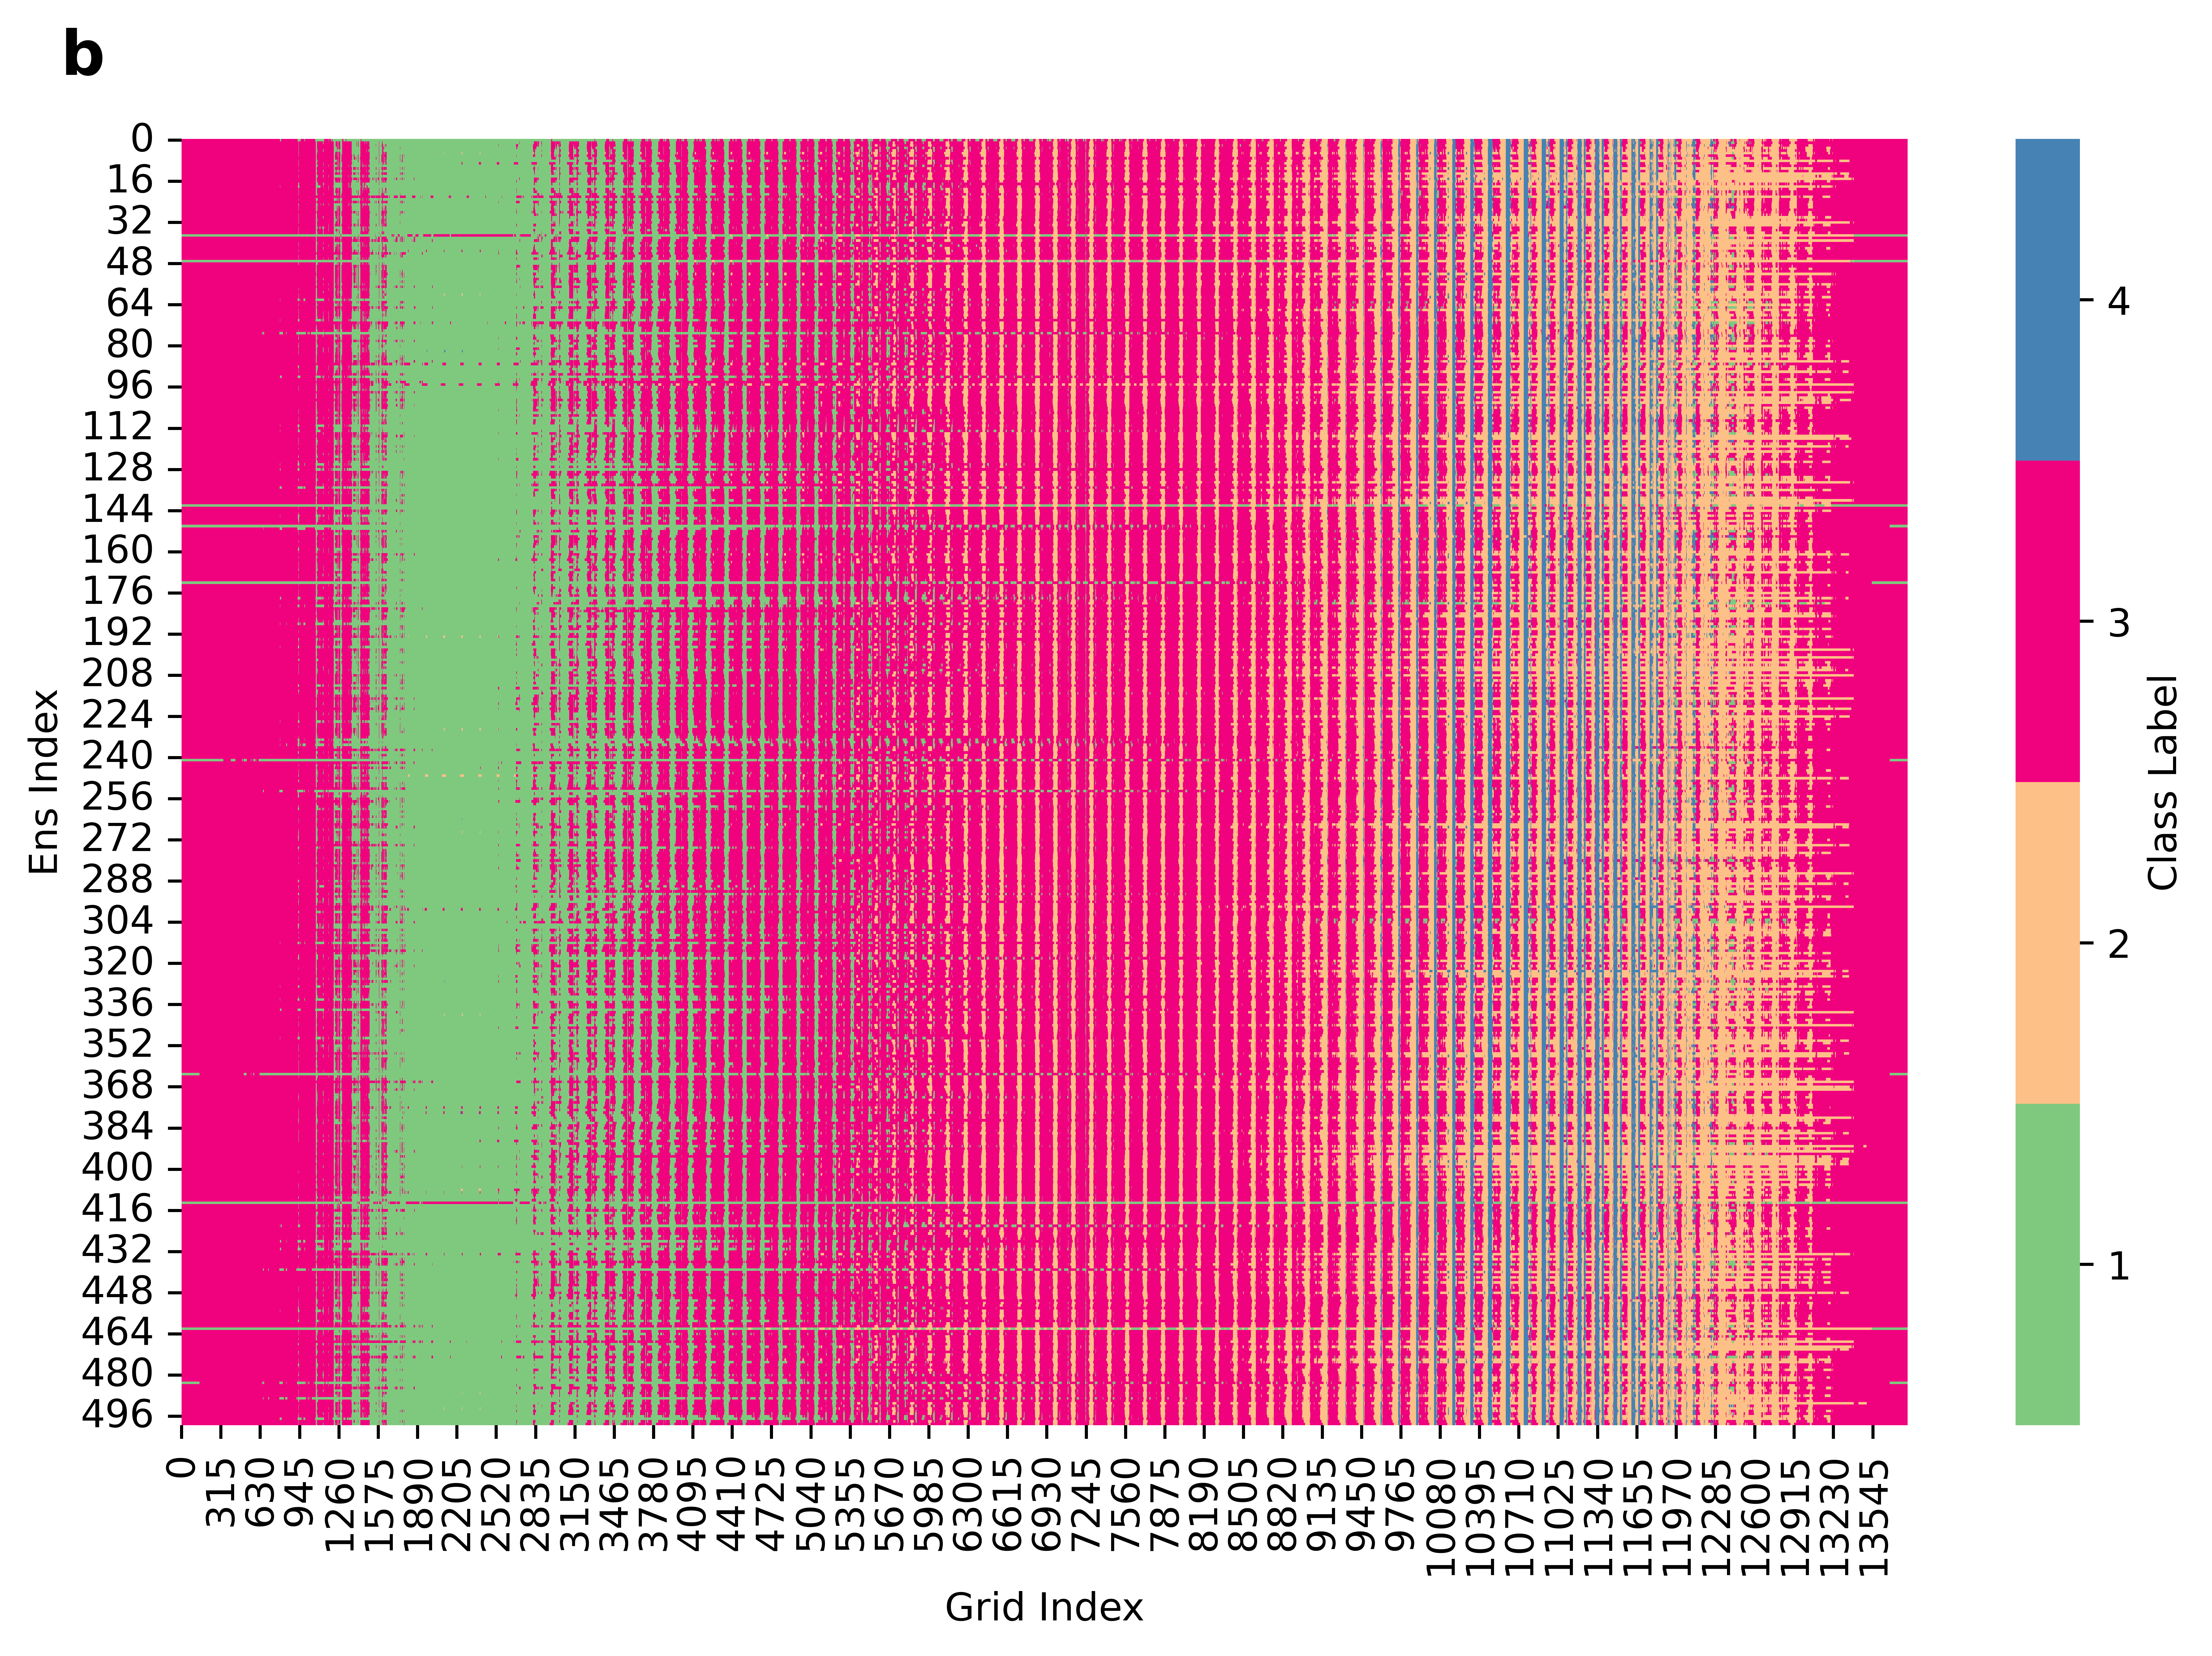

In [6]:
fig_corr_label=eaf.plot_ens_labels(labels_Ens_aligned,dpi=900,panel_label='b')
fig_corr_label.savefig('outputs/figureS2b.pdf', format='pdf', dpi=100, bbox_inches='tight')

# Merge figures

In [2]:
from PIL import Image

# Load the images
image1 = Image.open('fig_exp_temp/labels_uncorrected.png')
image2 = Image.open('fig_exp_temp/labels_corrected.png')

# Calculate the dimensions for the combined image
max_width = max(image1.width, image2.width)
total_height = image1.height + image2.height

# Create a new image with the appropriate size
combined_image = Image.new('RGB', (max_width, total_height))

# Paste the images onto the combined image
combined_image.paste(image1, (0, 0))
combined_image.paste(image2, (0, image1.height))

# Save the combined image
combined_image.save('fig_exp_temp/combined_labels_vertical.png')


In [26]:
# save the labels_Ens_aligned
import pickle
with open('ens_ana_data/labels_Ens_aligned.pkl', 'wb') as f:
    pickle.dump(labels_Ens_aligned, f)

In [27]:
# read the labels_Ens_aligned
import pickle

with open('ens_ana_data/labels_Ens_aligned.pkl', 'rb') as f:
    labels_Ens_aligned = pickle.load(f)

# Measure the consistency of results

For each grid point, see how many time the label of it is consistent in the 500 ensemble

In [31]:
import numpy as np
label_arrays = [entry['labels'] for entry in labels_Ens_aligned]
label_matrix = np.vstack(label_arrays)

In [32]:
import numpy as np


rows = label_matrix.shape[0]
columns = label_matrix.shape[1]

threshold_percentage = 90


# Define the threshold
threshold = threshold_percentage / 100.0 * rows

# Create a vector to store the result
label_check = np.zeros(columns, dtype=int)

for col_idx in range(columns):
    # Find the unique values and their counts in the column
    unique, counts = np.unique(label_matrix[:, col_idx], return_counts=True)
    # if col_idx==10:
    #     print(unique, counts)
    #     break
    
    # Find the number that exceeds the threshold
    if np.any(counts >= threshold):
        label_check[col_idx] = unique[np.argmax(counts)]
    else:
        # If no number exceeds the threshold, set to 999
        label_check[col_idx] = 5


# result_vector.reshape(96,144)

In [ ]:
# save the label_check
import pickle
with open('ens_ana_data/label_check.pkl', 'wb') as f:
    pickle.dump(label_check, f)

In [28]:
# read the label_check
import pickle
with open('ens_ana_data/label_check.pkl', 'rb') as f:
    label_check = pickle.load(f)

In [29]:
# read the probs_ens
import pickle
with open('ens_ana_data/probs_ens.pkl', 'rb') as f:
    probs_ens = pickle.load(f)


import numpy as np
prob_arrays = [entry['max_prob'] for entry in probs_ens]
prob_matrix = np.vstack(prob_arrays)

In [34]:
prob_matrix.shape[0]

500

In [35]:
prob_matrix.shape[1]

13824

In [31]:
label_matrix.shape[0]

500

In [32]:
label_matrix.shape[1]

13824

In [33]:
import numpy as np

rows = label_matrix.shape[0]
columns = label_matrix.shape[1]

threshold_percentage = 90
probability_threshold = 0.5

# Define the threshold based on the initial number of rows
threshold = threshold_percentage / 100.0 * rows

# Create a vector to store the result
label_check = np.zeros(columns, dtype=int)

for col_idx in range(columns):
    # Find the unique values and their counts in the column
    unique, counts = np.unique(label_matrix[:, col_idx], return_counts=True)
    
    # Check if any value meets the initial threshold
    if np.any(counts >= threshold):
        # Get the index of the most frequent label
        most_freq_index = np.argmax(counts)
        most_freq_label = unique[most_freq_index]
        
        # Get indices where the label matches the most frequent one
        label_indices = np.where(label_matrix[:, col_idx] == most_freq_label)[0]
        # Filter these indices based on the probability threshold
        filtered_indices = [idx for idx in label_indices if prob_matrix[idx, col_idx] > probability_threshold]
        
        # Update counts to only include those above the probability threshold
        if len(filtered_indices) >= threshold:
            label_check[col_idx] = most_freq_label
        else:
            label_check[col_idx] = 5  # No sufficient count after filtering
    else:
        label_check[col_idx] = 5  # No initial count meeting the threshold

print(label_check)



[2 2 2 ... 2 2 2]


In [34]:
# save the label_check
import pickle
with open('ens_ana_data/label_check_with_prob.pkl', 'wb') as f:
    pickle.dump(label_check, f)

In [35]:
# read the label_check
import pickle
with open('ens_ana_data/label_check_with_prob.pkl', 'rb') as f:
    label_check = pickle.load(f)

In [36]:
# load the ds_GMM_climo_relabeled
import xarray as xr
ds_GMM_climo_relabeled = xr.open_dataset('climo_ana_data/ds_GMM_climo_relabeled.nc')


Text(0.5, 0, 'Class Label')

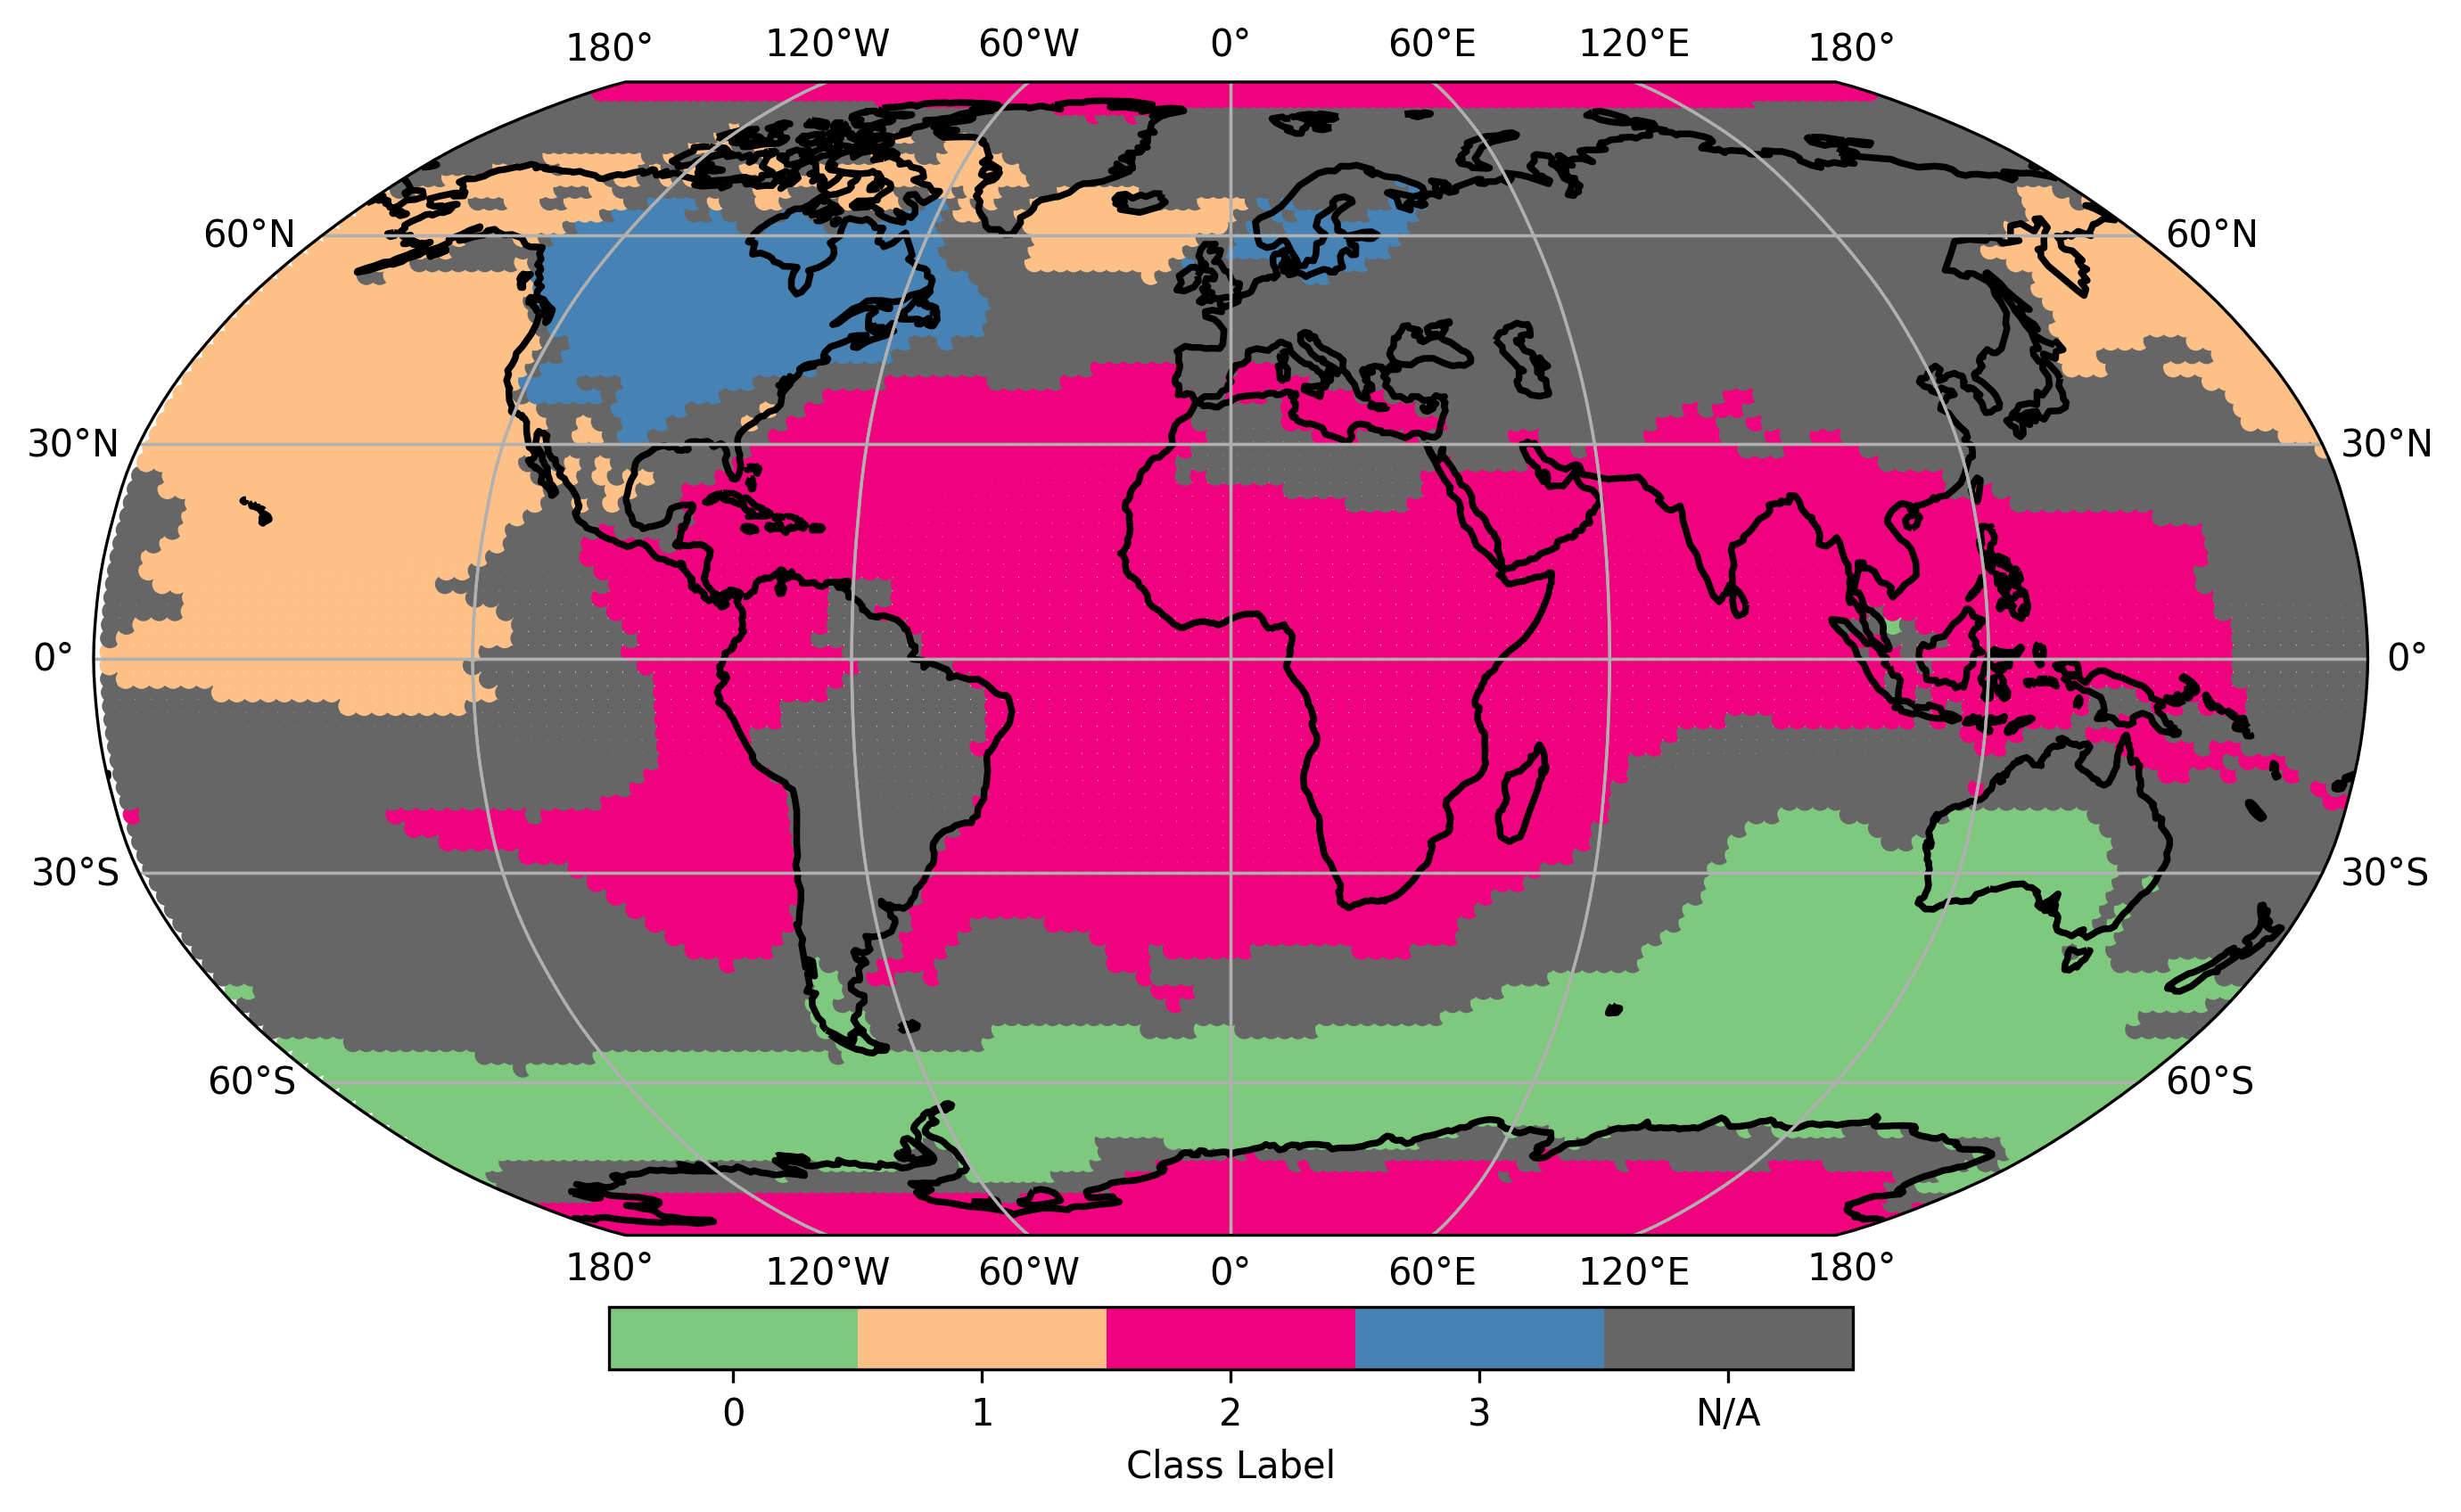

In [37]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import ListedColormap



fig, ax4 = plt.subplots(figsize=(12, 7), dpi=300,subplot_kw=dict(projection=ccrs.Robinson()))

unique_labels = np.unique(label_check)
# cmap = plt.get_cmap('Accent', len(unique_labels))
# cmap=[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),(0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
#       (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),(0.4, 0.4, 0.4),(0,0,0)
#       ]

custom_colors = [
    (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
    (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
    (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
    (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),
    (0.4, 0.4, 0.4)
]

# Create a ListedColormap object with your custom colors
cmap = ListedColormap(custom_colors)

ax4.add_feature(cfeature.COASTLINE, linewidth=1.8, edgecolor='black')
ax4.gridlines()
# ax4.add_feature(cfeature.BORDERS, linewidth=1.5, edgecolor='black')

# Generating meshgrid for lon-lat
lon, lat = np.meshgrid(ds_GMM_climo_relabeled.lon, ds_GMM_climo_relabeled.lat)

# Flattening the lon-lat and the label data for scatter plotting
lon_flat = lon.flatten()
lat_flat = lat.flatten()
labels_flat = label_check.flatten()

# # Using a scatter plot instead of pcolormesh
sc = ax4.scatter(lon_flat, lat_flat, c=labels_flat, cmap=cmap, transform=ccrs.PlateCarree(), alpha=1, s=19)  # s is the size of the scatter point
# plot heatmap with Robinson projection
# im = sat_label.plot(ax=ax4, transform=ccrs.PlateCarree(), cmap=cmap, shading='auto', add_colorbar=False)

gl = ax4.gridlines(draw_labels=True)

ax4.set_xlabel('Longitude')
ax4.set_ylabel('Latitude')

bounds = np.arange(len(np.unique(label_check))+1) - 0.5
ticks = np.arange(len(np.unique(label_check)))
cbar = fig.colorbar(sc, ax=ax4, orientation='horizontal', pad=0.05, boundaries=bounds, ticks=ticks, shrink=0.5)
# set the colorbar labels
cbar.ax.set_xticklabels(['0', '1', '2', '3', 'N/A'])
cbar.ax.set_xlabel('Class Label')

# Calculating the average curves for each class(with uncertain grid points removed)

In [39]:
# convert the label_check to a ndarray
label_check_reshaped = label_check.reshape(96,144)

In [57]:
label_check_reshaped.shape

(96, 144)

In [58]:
ds_sat

<xarray.Dataset>
Dimensions:  (nEns: 500, age: 65, lat: 96, lon: 144)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 1.11e+04 1.13e+04 1.15e+04 ... 2.37e+04 2.39e+04
  * nEns     (nEns) float32 1.0 2.0 3.0 4.0 5.0 ... 497.0 498.0 499.0 500.0
Data variables:
    sat      (nEns, age, lat, lon) float32 ...
    weight   (lat) float32 ...

In [63]:
label_check_reshaped.shape

(96, 144)

In [40]:
from toolbox import change_point_functions as cpf


ds_sat_i = ds_sat.isel(nEns=0)

ds_sat_i['class_label'] = (('lat', 'lon'), label_check_reshaped)

ds_sat_i = cpf.cal_anomalies(ds_sat_i, years=2000)
ds_sat_i

<xarray.Dataset>
Dimensions:        (age: 65, lat: 96, lon: 144)
Coordinates:
  * lat            (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon            (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * age            (age) float32 1.11e+04 1.13e+04 ... 2.37e+04 2.39e+04
    nEns           float32 1.0
Data variables:
    sat            (age, lat, lon) float32 ...
    weight         (lat) float32 ...
    class_label    (lat, lon) int32 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2
    sat_anomalies  (age, lat, lon) float32 1.029 1.05 1.048 ... -19.12 -19.13

In [41]:
import numpy as np
from toolbox import change_point_functions as cpf

sat_shape = ds_sat['sat'].isel(nEns=0).shape

# Initialize a list to store the weighted average curves for all iterations
all_weighted_avg_curves_checked = []

for i in range(len(ds_sat['nEns'])):
    # Select the ensemble member
    ds_sat_i = ds_sat.isel(nEns=i)
    
    ds_sat_i['class_label'] = (('lat', 'lon'), label_check_reshaped)
    # ds_sat_i = cpf.cal_anomalies(ds_sat_i, years=2000)
    
    weighted_avg_curves_checked = {}

    for j in range(4):
        # Calculate the weighted average curve for class j
        weighted_avg_curves_checked[j] = cpf.cal_weighted_average_curve(ds_sat_i, j,sat_var_name='sat')
    
    # Append the dictionary of weighted average curves for the current iteration to the list
    all_weighted_avg_curves_checked.append(weighted_avg_curves_checked)


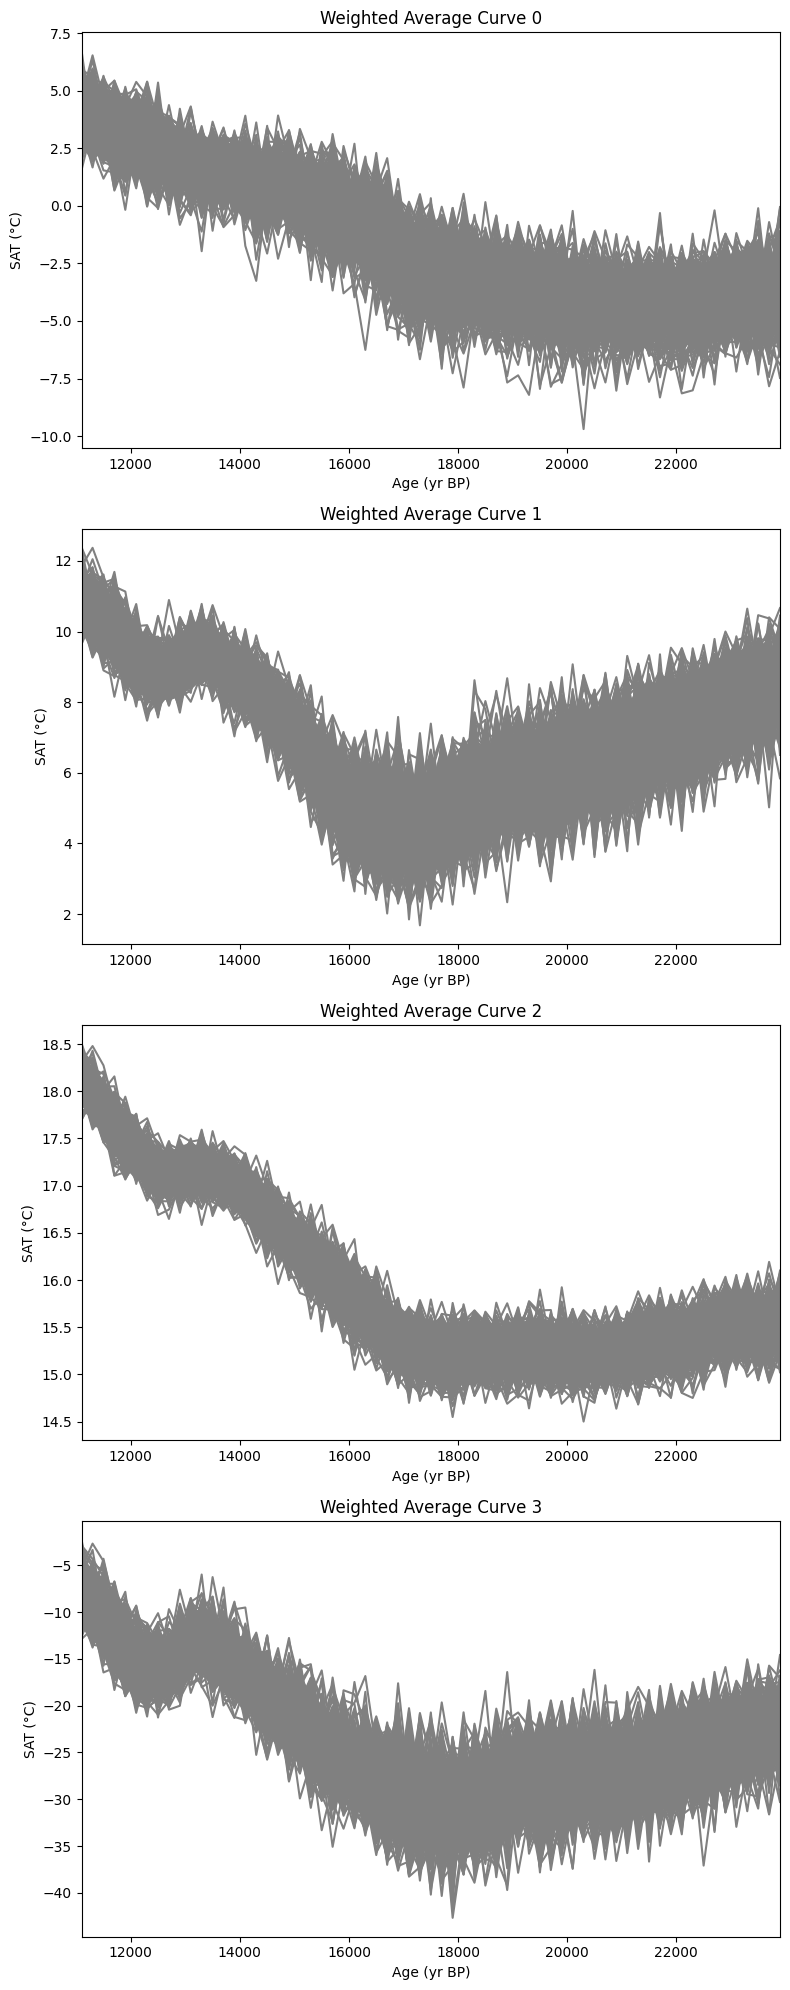

In [42]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np


all_weighted_avg_curves=all_weighted_avg_curves_checked

# Set up the figure and GridSpec
fig = plt.figure(figsize=(8, 20))  # Adjust the size as needed
gs = gridspec.GridSpec(4, 1, figure=fig)

# Plot each weighted_avg_curves[i]
for i in range(4):
    # Extract the i-th weighted average curve from each set in all_weighted_avg_curves, if it exists
    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]

    ax = fig.add_subplot(gs[i, 0])
    # Loop through each curve in weighted_avg_curves_k and plot
    for idx,curve in enumerate(weighted_avg_curves_k):
        ax.plot(ds_sat['age'].values,curve,color='grey')  # Use the loop index as the ensemble identifier

    ax.set_title(f'Weighted Average Curve {i}')
    ax.set_xlabel('Age (yr BP)')  # Assuming 'Index' is the correct x-axis label
    ax.set_ylabel('SAT (°C)')  # Assuming 'Value' is the correct y-axis label
    # set x-axis range
    ax.set_xlim(np.min(ds_sat['age'].values), np.max(ds_sat['age'].values))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# Store the average curves

In [43]:
# save the all_weighted_avg_curves
import pickle
with open('ens_ana_data/all_weighted_avg_curves_checked.pkl', 'wb') as f:
    pickle.dump(all_weighted_avg_curves_checked, f)

In [44]:
# read the all_weighted_avg_curves
import pickle
with open('ens_ana_data/all_weighted_avg_curves_checked.pkl', 'rb') as f:
    all_weighted_avg_curves_checked = pickle.load(f)